<div style="text-align: right">CSYE 7996 Master's Thesis with Noctis Yamazaki-Triendl</div>
<div style="text-align: right">Experiments, 18 - 26 May 2023</div>

# 1. Traverse City

We attempt to verify that cloud sequences are contiguous

In [253]:
import os
import pandas as pd
import numpy as np
import pickle
import ast

# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

In [255]:
les = pd.read_csv(r'data/meteo_combined.csv')
les.head()

Date_UTC Time_UTC    Date_CST Time_CST  \
0  2006-10-01    00:00  2006-09-30    18:00   
1  2006-10-01    01:00  2006-09-30    19:00   
2  2006-10-01    02:00  2006-09-30    20:00   
3  2006-10-01    03:00  2006-09-30    21:00   
4  2006-10-01    04:00  2006-09-30    22:00   

                       File_name_for_1D_lake  \
0  goes11.2006.10.01.0000.v01.nc-var1-t0.csv   
1  goes11.2006.10.01.0100.v01.nc-var1-t0.csv   
2  goes11.2006.10.01.0200.v01.nc-var1-t0.csv   
3  goes11.2006.10.01.0300.v01.nc-var1-t0.csv   
4  goes11.2006.10.01.0400.v01.nc-var1-t0.csv   

                             File_name_for_2D_lake  \
0  T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv   
1  T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv   
2  T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv   
3  T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv   
4  T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv   

                                        Lake_data_1D  \
0  [0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...   
1  [0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...   
2  [0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...   
3  [0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...   
4  [0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...   

                                        Lake_data_2D Temp (F) RH (%)  ...  \
0  [array([   nan,    nan,    nan,    nan,    nan...       51     92  ...   
1  [array([   nan,    nan,    nan,    nan,    nan...       48     96  ...   
2  [array([nan, nan, nan, nan, nan, nan, nan, nan...       49     92  ...   
3  [array([nan, nan, nan, nan, nan, nan, nan, nan...       48    100  ...   
4  [array([   nan,    nan,    nan,    nan,    nan...       50     92  ...   

  Low Cloud Ht (ft) Med Cloud Ht (ft) High Cloud Ht (ft) Visibility (mi)  \
0              3700                 m                  m              10   
1              3700                 m                  m              10   
2              3700                 m                  m              10   
3              2500              6500                  m               6   
4              7000                 m                  m               8   

  Atm Press (hPa) Sea Lev Press (hPa) Altimeter (hPa) Precip (in)  \
0           984.4             1007.20         1007.10        0.00   
1           984.7             1007.80         1007.50        0.00   
2           985.4             1008.30         1008.10        0.00   
3           986.0                   M         1008.80        0.02   
4           986.4             1009.50         1009.10        0.00   

  Wind Chill (F) Heat Index (F)  
0             NC             NC  
1             NC             NC  
2             NC             NC  
3             NC             NC  
4             NC             NC  

[5 rows x 24 columns]

# 2. EDA

In [256]:
column_names = les.columns.tolist()
print(column_names)

['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake', 'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D', 'Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 'Wind Direction (deg)', 'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)', 'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Visibility (mi)', 'Atm Press (hPa)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)', 'Precip (in)', 'Wind Chill (F)', 'Heat Index (F)']


In [257]:
# Renaming
les.rename(columns={ "Temp (F)": "Temp_F", "RH (%)": "RH_pct",
                   "Dewpt (F)" : "Dewpt_F", "Wind Spd (mph)" : "Wind_Spd_mph",
                   "Wind Direction (deg)" : "Wind_Direction_deg", "Peak Wind Gust(mph)" : "Peak_Wind_Gust_mph",
                   "Low Cloud Ht (ft)" : "Low_Cloud_Ht_ft", "Med Cloud Ht (ft)" : "Med_Cloud_Ht_ft",
                   "High Cloud Ht (ft)" : "High_Cloud_Ht_ft", "Visibility (mi)" : "Visibility_mi",
                   "Atm Press (hPa)" : "Atm_Press_hPa", "Sea Lev Press (hPa)" : "Sea_Lev_Press_hPa",
                   "Altimeter (hPa)" : "Altimeter_hPa", "Precip (in)" : "Precip_in",
                   "Wind Chill (F)" : "Wind_Chill_F", "Heat Index (F)" : "Heat_Index_F",
                   } , inplace = True)

les.head()

Date_UTC Time_UTC    Date_CST Time_CST  \
0  2006-10-01    00:00  2006-09-30    18:00   
1  2006-10-01    01:00  2006-09-30    19:00   
2  2006-10-01    02:00  2006-09-30    20:00   
3  2006-10-01    03:00  2006-09-30    21:00   
4  2006-10-01    04:00  2006-09-30    22:00   

                       File_name_for_1D_lake  \
0  goes11.2006.10.01.0000.v01.nc-var1-t0.csv   
1  goes11.2006.10.01.0100.v01.nc-var1-t0.csv   
2  goes11.2006.10.01.0200.v01.nc-var1-t0.csv   
3  goes11.2006.10.01.0300.v01.nc-var1-t0.csv   
4  goes11.2006.10.01.0400.v01.nc-var1-t0.csv   

                             File_name_for_2D_lake  \
0  T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv   
1  T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv   
2  T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv   
3  T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv   
4  T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv   

                                        Lake_data_1D  \
0  [0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...   
1  [0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...   
2  [0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...   
3  [0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...   
4  [0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...   

                                        Lake_data_2D Temp_F RH_pct  ...  \
0  [array([   nan,    nan,    nan,    nan,    nan...     51     92  ...   
1  [array([   nan,    nan,    nan,    nan,    nan...     48     96  ...   
2  [array([nan, nan, nan, nan, nan, nan, nan, nan...     49     92  ...   
3  [array([nan, nan, nan, nan, nan, nan, nan, nan...     48    100  ...   
4  [array([   nan,    nan,    nan,    nan,    nan...     50     92  ...   

  Low_Cloud_Ht_ft Med_Cloud_Ht_ft High_Cloud_Ht_ft Visibility_mi  \
0            3700               m                m            10   
1            3700               m                m            10   
2            3700               m                m            10   
3            2500            6500                m             6   
4            7000               m                m             8   

  Atm_Press_hPa Sea_Lev_Press_hPa Altimeter_hPa Precip_in Wind_Chill_F  \
0         984.4           1007.20       1007.10      0.00           NC   
1         984.7           1007.80       1007.50      0.00           NC   
2         985.4           1008.30       1008.10      0.00           NC   
3         986.0                 M       1008.80      0.02           NC   
4         986.4           1009.50       1009.10      0.00           NC   

  Heat_Index_F  
0           NC  
1           NC  
2           NC  
3           NC  
4           NC  

[5 rows x 24 columns]

#### Missing value handling in dataframe
- As per the abbr in the table:
    - `m` or `M`: Data is missing
    - `NC`: Wind Chill/Heat Index do not meet the required thresholds to be calculated

Replace the missing values with 0.

In [258]:
# Replace with 0
les = les.replace(['m', 'M'], '0')

#### Drop **Wind_Chill_F** and **Heat_Index_F** due to a large number of NC values

In [259]:
les = les.drop(['Wind_Chill_F', 'Heat_Index_F'], axis=1)
les = les.reset_index(drop=True)

In [260]:
def missing_values(df):
    total_null = df.isna().sum()
    percent_null = total_null / df.count() # Total count of null values / Total count of values
    missing_data = pd.concat([total_null, percent_null], axis = 1, keys = ['Total Null', 'Percentage Null'])
    return missing_data

missing_values(les)

Total Null  Percentage Null
Date_UTC                        0         0.000000
Time_UTC                        0         0.000000
Date_CST                        0         0.000000
Time_CST                        0         0.000000
File_name_for_1D_lake        2942         0.065119
File_name_for_2D_lake        2942         0.065119
Lake_data_1D                    0         0.000000
Lake_data_2D                    0         0.000000
Temp_F                        239         0.004991
RH_pct                        239         0.004991
Dewpt_F                       239         0.004991
Wind_Spd_mph                  239         0.004991
Wind_Direction_deg            239         0.004991
Peak_Wind_Gust_mph            239         0.004991
Low_Cloud_Ht_ft               239         0.004991
Med_Cloud_Ht_ft               239         0.004991
High_Cloud_Ht_ft              239         0.004991
Visibility_mi                 239         0.004991
Atm_Press_hPa                 239         0.004991
Sea_Lev_Press_hPa             239         0.004991
Altimeter_hPa                 239         0.004991
Precip_in                     239         0.004991

Dropping null values:

In [261]:
les = les.dropna()
print('Total observation count after missing value treatment: ', len(les))

Total observation count after missing value treatment:  44942


>**Note to self**: Next run, replace NA with 0 because we may actually have erased too many records by dropping NAs...

#### Changing Datatype

In [262]:
les.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44942 entries, 0 to 48120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date_UTC               44942 non-null  object
 1   Time_UTC               44942 non-null  object
 2   Date_CST               44942 non-null  object
 3   Time_CST               44942 non-null  object
 4   File_name_for_1D_lake  44942 non-null  object
 5   File_name_for_2D_lake  44942 non-null  object
 6   Lake_data_1D           44942 non-null  object
 7   Lake_data_2D           44942 non-null  object
 8   Temp_F                 44942 non-null  object
 9   RH_pct                 44942 non-null  object
 10  Dewpt_F                44942 non-null  object
 11  Wind_Spd_mph           44942 non-null  object
 12  Wind_Direction_deg     44942 non-null  object
 13  Peak_Wind_Gust_mph     44942 non-null  object
 14  Low_Cloud_Ht_ft        44942 non-null  object
 15  Med_Cloud_Ht_ft        4

In [263]:
# Using apply method
columns = les.columns
les[columns[8:]] = les[columns[8:]].apply(pd.to_numeric, errors='coerce')

In [264]:
les.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44942 entries, 0 to 48120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date_UTC               44942 non-null  object 
 1   Time_UTC               44942 non-null  object 
 2   Date_CST               44942 non-null  object 
 3   Time_CST               44942 non-null  object 
 4   File_name_for_1D_lake  44942 non-null  object 
 5   File_name_for_2D_lake  44942 non-null  object 
 6   Lake_data_1D           44942 non-null  object 
 7   Lake_data_2D           44942 non-null  object 
 8   Temp_F                 44942 non-null  float64
 9   RH_pct                 44942 non-null  float64
 10  Dewpt_F                44942 non-null  float64
 11  Wind_Spd_mph           44942 non-null  int64  
 12  Wind_Direction_deg     44942 non-null  int64  
 13  Peak_Wind_Gust_mph     44942 non-null  int64  
 14  Low_Cloud_Ht_ft        44942 non-null  int64  
 15  Med_Clo

#### Dropping data for the night-time
We focus on data from **14:00 UTC to 21:00 UTC**, when there is enough sunlight to generate reflections and capture useful information. This time window provides valid data for the experiment and can be used to extract important insights from Lake Michigan and its surrounding areas.

`14:00 UTC is 10:00am EST and 21:00 UTC is 5:00pm EST.`

In [265]:
filtered_les = les.loc[(les['Time_UTC'] >= '14:00')
                     & (les['Time_UTC'] <= '21:00')]
filtered_les

Date_UTC Time_UTC    Date_CST Time_CST  \
14     2006-10-01    14:00  2006-10-01    08:00   
15     2006-10-01    15:00  2006-10-01    09:00   
16     2006-10-01    16:00  2006-10-01    10:00   
17     2006-10-01    17:00  2006-10-01    11:00   
18     2006-10-01    18:00  2006-10-01    12:00   
...           ...      ...         ...      ...   
48114  2015-03-31    17:00  2015-03-31    11:00   
48115  2015-03-31    18:00  2015-03-31    12:00   
48116  2015-03-31    19:00  2015-03-31    13:00   
48117  2015-03-31    20:00  2015-03-31    14:00   
48118  2015-03-31    21:00  2015-03-31    15:00   

                           File_name_for_1D_lake  \
14     goes11.2006.10.01.1400.v01.nc-var1-t0.csv   
15     goes11.2006.10.01.1500.v01.nc-var1-t0.csv   
16     goes11.2006.10.01.1600.v01.nc-var1-t0.csv   
17     goes11.2006.10.01.1700.v01.nc-var1-t0.csv   
18     goes11.2006.10.01.1800.v01.nc-var1-t0.csv   
...                                          ...   
48114  goes15.2015.03.31.1700.v01.nc-var1-t0.csv   
48115  goes15.2015.03.31.1800.v01.nc-var1-t0.csv   
48116  goes15.2015.03.31.1900.v01.nc-var1-t0.csv   
48117  goes15.2015.03.31.2000.v01.nc-var1-t0.csv   
48118  goes15.2015.03.31.2100.v01.nc-var1-t0.csv   

                                 File_name_for_2D_lake  \
14     T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv   
15     T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv   
16     T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv   
17     T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv   
18     T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv   
...                                                ...   
48114  T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv   
48115  T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv   
48116  T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv   
48117  T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv   
48118  T_goes15.2015.03.31.2100.v01.nc-var1-t0.csv.csv   

                                            Lake_data_1D  \
14     [0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...   
15     [0.067499995, 0.067499995, 0.06, 0.06, 0.05749...   
16     [0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...   
17     [0.067499995, 0.067499995, 0.067499995, 0.07, ...   
18     [0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...   
...                                                  ...   
48114  [0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...   
48115  [0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...   
48116  [0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...   
48117  [0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...   
48118  [0.2225, 0.18249999, 0.19, 0.17999999, 0.1725,...   

                                            Lake_data_2D  Temp_F  RH_pct  ...  \
14     [array([       nan,        nan,        nan,   ...    48.0    92.0  ...   
15     [array([       nan,        nan,        nan,   ...    55.0    59.0  ...   
16     [array([   nan,    nan,    nan,    nan,    nan...    55.0    61.0  ...   
17     [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    58.0    55.0  ...   
18     [array([   nan,    nan,    nan,    nan,    nan...    56.0    59.0  ...   
...                                                  ...     ...     ...  ...   
48114  [array([   nan,    nan,    nan,    nan,    nan...    43.0    42.0  ...   
48115  [array([   nan,    nan,    nan,    nan,    nan...    44.0    43.0  ...   
48116  [array([       nan,        nan,        nan,   ...    44.0    39.0  ...   
48117  [array([   nan,    nan,    nan,    nan,    nan...    44.0    43.0  ...   
48118  [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    40.0    52.0  ...   

       Wind_Direction_deg  Peak_Wind_Gust_mph  Low_Cloud_Ht_ft  \
14                      0                   0             3600   
15                    300                   0             3600   
16                    300                   0             3600   
17                    290                   0             3600   
18                    260                   0     

In [266]:
filtered_les = filtered_les.reset_index(drop=True)
filtered_les.head()

Date_UTC Time_UTC    Date_CST Time_CST  \
0  2006-10-01    14:00  2006-10-01    08:00   
1  2006-10-01    15:00  2006-10-01    09:00   
2  2006-10-01    16:00  2006-10-01    10:00   
3  2006-10-01    17:00  2006-10-01    11:00   
4  2006-10-01    18:00  2006-10-01    12:00   

                       File_name_for_1D_lake  \
0  goes11.2006.10.01.1400.v01.nc-var1-t0.csv   
1  goes11.2006.10.01.1500.v01.nc-var1-t0.csv   
2  goes11.2006.10.01.1600.v01.nc-var1-t0.csv   
3  goes11.2006.10.01.1700.v01.nc-var1-t0.csv   
4  goes11.2006.10.01.1800.v01.nc-var1-t0.csv   

                             File_name_for_2D_lake  \
0  T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv   
1  T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv   
2  T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv   
3  T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv   
4  T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv   

                                        Lake_data_1D  \
0  [0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...   
1  [0.067499995, 0.067499995, 0.06, 0.06, 0.05749...   
2  [0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...   
3  [0.067499995, 0.067499995, 0.067499995, 0.07, ...   
4  [0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...   

                                        Lake_data_2D  Temp_F  RH_pct  ...  \
0  [array([       nan,        nan,        nan,   ...    48.0    92.0  ...   
1  [array([       nan,        nan,        nan,   ...    55.0    59.0  ...   
2  [array([   nan,    nan,    nan,    nan,    nan...    55.0    61.0  ...   
3  [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    58.0    55.0  ...   
4  [array([   nan,    nan,    nan,    nan,    nan...    56.0    59.0  ...   

   Wind_Direction_deg  Peak_Wind_Gust_mph  Low_Cloud_Ht_ft  Med_Cloud_Ht_ft  \
0                   0                   0             3600                0   
1                 300                   0             3600                0   
2                 300                   0             3600                0   
3                 290                   0             3600                0   
4                 260                   0             3600                0   

   High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  Sea_Lev_Press_hPa  \
0                 0             10          993.0             1016.3   
1                 0             10          993.7             1016.9   
2                 0             10          994.3             1017.5   
3                 0             10          995.0             1018.0   
4                 0             10          995.0             1018.1   

   Altimeter_hPa  Precip_in  
0         1015.9        0.0  
1         1016.6        0.0  
2         1017.3        0.0  
3         1017.9        0.0  
4         1017.9        0.0  

[5 rows x 22 columns]

In [267]:
# Summary
filtered_les.describe()

Temp_F        RH_pct       Dewpt_F  Wind_Spd_mph  \
count  14951.000000  14951.000000  14951.000000  14951.000000   
mean      35.158986     68.134038     25.198314      8.278443   
std       14.900897     15.099056     13.676064      4.890875   
min      -13.000000      0.000000    -20.000000      0.000000   
25%       25.000000     58.000000     16.000000      5.000000   
50%       34.000000     70.000000     25.000000      8.000000   
75%       45.000000     79.000000     34.000000     11.000000   
max       88.000000    100.000000     67.000000     32.000000   

       Wind_Direction_deg  Peak_Wind_Gust_mph  Low_Cloud_Ht_ft  \
count        14951.000000        14951.000000     14951.000000   
mean           169.181326            5.469400      4409.435489   
std            122.778311           10.092296      5578.458635   
min              0.000000            0.000000         0.000000   
25%             30.000000            0.000000      1600.000000   
50%            200.000000            0.000000      2500.000000   
75%            270.000000            0.000000      4000.000000   
max            360.000000           56.000000     28000.000000   

       Med_Cloud_Ht_ft  High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  \
count     14951.000000      14951.000000   14951.000000   14951.000000   
mean       4068.312487       1367.146010       7.902682     990.775179   
std        6712.363475       4531.667266       3.138534      46.758314   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          0.000000       6.000000     987.000000   
50%        1200.000000          0.000000      10.000000     993.300000   
75%        4400.000000          0.000000      10.000000     999.300000   
max       25000.000000      25000.000000      10.000000    1019.300000   

       Sea_Lev_Press_hPa  Altimeter_hPa     Precip_in  
count       14951.000000   14951.000000  14951.000000  
mean          952.939221    1015.347662      0.002189  
std           246.719346      23.806878      0.015708  
min             0.000000       0.000000      0.000000  
25%          1009.200000    1009.800000      0.000000  
50%          1016.500000    1016.300000      0.000000  
75%          1022.900000    1022.400000      0.000000  
max          1044.500000    1042.700000      0.860000

In [268]:
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])

Total observations:  14951
Total number of features:  22


In [269]:
data_sample = les['Lake_data_1D'][16]
data_sample

'[0.0725, 0.067499995, 0.07, 0.07, 0.067499995, 0.067499995, 0.065, 0.067499995, 0.07, 0.0625, 0.0625, 0.06, 0.0625, 0.055, 0.067499995, 0.055, 0.065, 0.07, 0.065, 0.0725, 0.0775, 0.0625, 0.067499995, 0.0625, 0.065, 0.067499995, 0.0625, 0.0625, 0.06, 0.0625, 0.0625, 0.065, 0.06, 0.06, 0.0625, 0.0625, 0.067499995, 0.067499995, 0.067499995, 0.067499995, 0.0775, 0.074999996, 0.067499995, 0.065, 0.049999997, 0.049999997, 0.067499995, 0.067499995, 0.055, 0.055, 0.0725, 0.067499995, 0.065, 0.0625, 0.065, 0.0625, 0.065, 0.057499997, 0.065, 0.0725, 0.0625, 0.0625, 0.065, 0.07, 0.067499995, 0.0625, 0.057499997, 0.055, 0.0625, 0.074999996, 0.055, 0.06, 0.0625, 0.067499995, 0.057499997, 0.0625, 0.067499995, 0.065, 0.057499997, 0.065, 0.0625, 0.0625, 0.067499995, 0.06, 0.0625, 0.067499995, 0.065, 0.085, 0.067499995, 0.082499996, 0.057499997, 0.0625, 0.055, 0.06, 0.067499995, 0.057499997, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.055, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.057499997, 0.06749

# 3. Cloud Imagery

In [270]:
def arrays_2_png(lat, lon, val, fig_name):
    status_code = -1
    # Here it starts
    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.colorbar(orientation='vertical')
        plt.savefig('data/lake-michigan-images/' + fig_name + '.png')
        status_code = 0
    else:
        status_code = 255

    return status_code

In [271]:
df_lat_lon = df_lat_lon = pd.read_csv(
    r'data/lat_long_1D_labels_for_plotting.csv')
df_lat_lon.head(5)

latitude  longitude
0     41.78     -87.54
1     41.78     -87.50
2     41.78     -87.46
3     41.78     -87.42
4     41.78     -87.38

In [272]:
df_lat_lon.shape

(3599, 2)

In [273]:
lat_lst = df_lat_lon['latitude'].to_list()
lon_lst = df_lat_lon['longitude'].to_list()

In [274]:
data_sample = filtered_les['Lake_data_1D'][16]
data_sample

'[0.1575, 0.1375, 0.13, 0.1325, 0.1325, 0.1275, 0.13, 0.1275, 0.13499999, 0.1275, 0.1525, 0.22, 0.19749999, 0.155, 0.1375, 0.1525, 0.1425, 0.1475, 0.16, 0.13499999, 0.1325, 0.125, 0.114999995, 0.1275, 0.125, 0.145, 0.1425, 0.1325, 0.16499999, 0.1925, 0.19749999, 0.17, 0.14999999, 0.13499999, 0.16499999, 0.16, 0.16499999, 0.16499999, 0.1725, 0.21, 0.13499999, 0.1375, 0.1325, 0.122499995, 0.1275, 0.114999995, 0.122499995, 0.1275, 0.13499999, 0.1525, 0.16749999, 0.12, 0.14, 0.13, 0.1325, 0.13, 0.16, 0.155, 0.1625, 0.175, 0.16, 0.205, 0.17, 0.1475, 0.16499999, 0.1525, 0.13, 0.12, 0.1375, 0.1325, 0.1475, 0.175, 0.2025, 0.1275, 0.1175, 0.1275, 0.1325, 0.13499999, 0.13, 0.1375, 0.1475, 0.16749999, 0.1725, 0.18249999, 0.195, 0.1475, 0.1325, 0.122499995, 0.175, 0.1525, 0.16499999, 0.1425, 0.13499999, 0.1325, 0.13499999, 0.1475, 0.145, 0.13, 0.1275, 0.1175, 0.114999995, 0.1275, 0.13, 0.1325, 0.1275, 0.1275, 0.1325, 0.1625, 0.19999999, 0.1525, 0.16749999, 0.1375, 0.14, 0.11, 0.14999999, 0.1475, 0

In [275]:
data_sample2 = filtered_les['Lake_data_2D'][16]
data_sample2

'[array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan, 0.37,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan]), array([       nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              n

# 1D data conversion 

In [276]:
import ast

data_sample_lst = ast.literal_eval(data_sample)
data_sample_lst[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [277]:
ldata_sample = data_sample.strip('][').split(', ')
ldata_sample[0:10]

['0.1575',
 '0.1375',
 '0.13',
 '0.1325',
 '0.1325',
 '0.1275',
 '0.13',
 '0.1275',
 '0.13499999',
 '0.1275']

In [278]:
data_sample_lst2 = [float(el) for el in ldata_sample]
data_sample_lst2[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [53]:
data_sample_lst2 = [float(el) for el in filtered_les['Lake_data_1D'][16].strip('][').split(', ')]
data_sample_lst2[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [279]:
data_sample_lst == data_sample_lst2

True

# 2D data conversion

In [280]:
data_sample2.strip('][')

'array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan, 0.37,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan]), array([       nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              na

In [281]:
data_sample2.strip('][').split('array')[1:]

['([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan, 0.37,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan]), ',
 '([       nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,  

In [282]:
[el.strip('()').strip('), ').strip('][') for el in data_sample2.strip('][').split('array')[1:]]

[' nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan, 0.37,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan',
 '       nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        na

In [283]:
[el.strip('()').strip('), ').strip('][').split(', ') for el in data_sample2.strip('][').split('array')[1:]]

[[' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan,\n        nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan,\n        nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan,\n        nan',
  ' nan',
  ' nan',
  '0.37',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan,\n        nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan,\n        nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan,\n        nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan,\n        nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan,\n        nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan',
  ' nan'

What the heck is all this stringing crap? I give up!

# Plotting 1D data

0

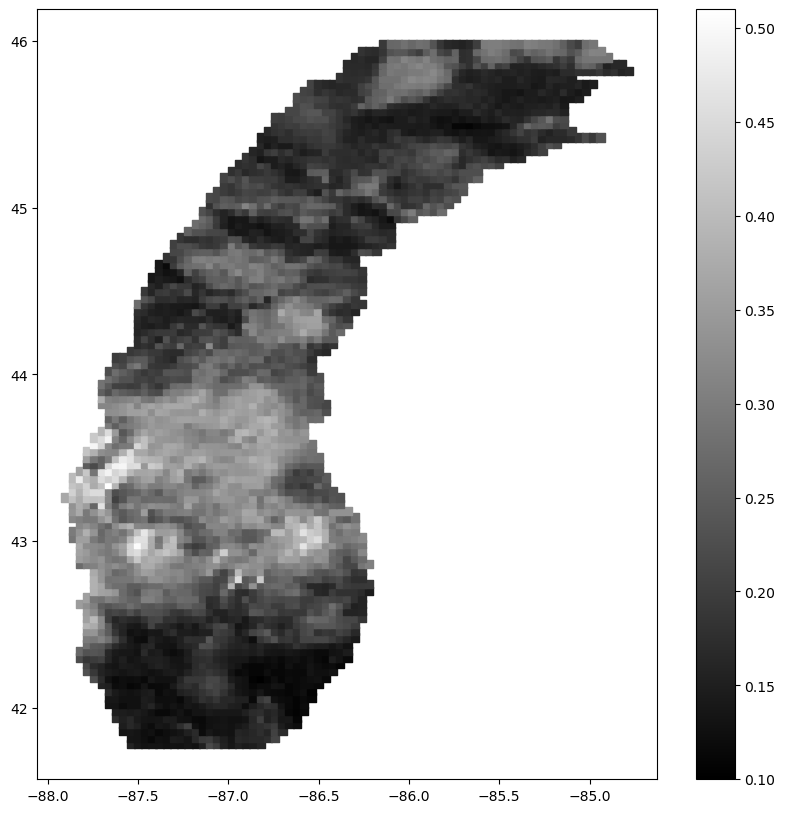

In [284]:
arrays_2_png(lat_lst, lon_lst, data_sample_lst, 'sample')

In [56]:
filtered_les.loc[5177]

Date_UTC                                                        2008-01-10
Time_UTC                                                             16:00
Date_CST                                                        2008-01-10
Time_CST                                                             16:00
File_name_for_1D_lake            goes11.2008.01.10.1600.v01.nc-var1-t0.csv
File_name_for_2D_lake      T_goes11.2008.01.10.1600.v01.nc-var1-t0.csv.csv
Lake_data_1D             [0.2375, 0.2325, 0.22749999, 0.255, 0.24749999...
Lake_data_2D             [array([       nan,        nan,        nan,   ...
Temp_F                                                                36.0
RH_pct                                                                58.0
Dewpt_F                                                               23.0
Wind_Spd_mph                                                             8
Wind_Direction_deg                                                      80
Peak_Wind_Gust_mph       

0

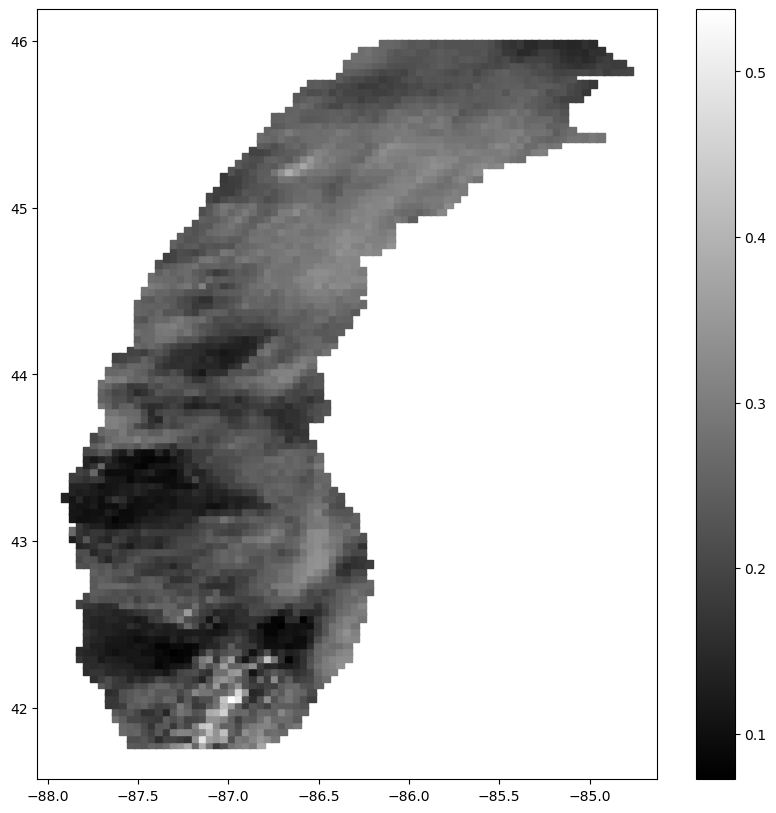

In [88]:
arrays_2_png(lat_lst, lon_lst, ast.literal_eval(filtered_les['Lake_data_1D'][5177]), 'sample')

In [58]:
les['Lake_data_1D'][5177].strip('][').split(', ')

['0.1025',
 '0.095',
 '0.095',
 '0.089999996',
 '0.082499996',
 '0.095',
 '0.0875',
 '0.082499996',
 '0.082499996',
 '0.095',
 '0.082499996',
 '0.085',
 '0.082499996',
 '0.089999996',
 '0.082499996',
 '0.089999996',
 '0.095',
 '0.095',
 '0.1025',
 '0.1025',
 '0.085',
 '0.0875',
 '0.089999996',
 '0.0775',
 '0.0925',
 '0.085',
 '0.082499996',
 '0.089999996',
 '0.082499996',
 '0.0775',
 '0.0875',
 '0.089999996',
 '0.0775',
 '0.0775',
 '0.085',
 '0.0725',
 '0.089999996',
 '0.0875',
 '0.1025',
 '0.0875',
 '0.0975',
 '0.0925',
 '0.0875',
 '0.089999996',
 '0.089999996',
 '0.089999996',
 '0.082499996',
 '0.082499996',
 '0.0925',
 '0.0875',
 '0.085',
 '0.0925',
 '0.082499996',
 '0.0875',
 '0.085',
 '0.0875',
 '0.0875',
 '0.082499996',
 '0.089999996',
 '0.089999996',
 '0.085',
 '0.089999996',
 '0.095',
 '0.105',
 '0.0925',
 '0.082499996',
 '0.089999996',
 '0.089999996',
 '0.089999996',
 '0.08',
 '0.085',
 '0.0775',
 '0.08',
 '0.0875',
 '0.08',
 '0.082499996',
 '0.074999996',
 '0.067499995',
 '0.

In [60]:
def rectify(crap_string):
    return [0.0 if el == 'nan' else float(el) for el in crap_string.strip('][').split(', ')]

0

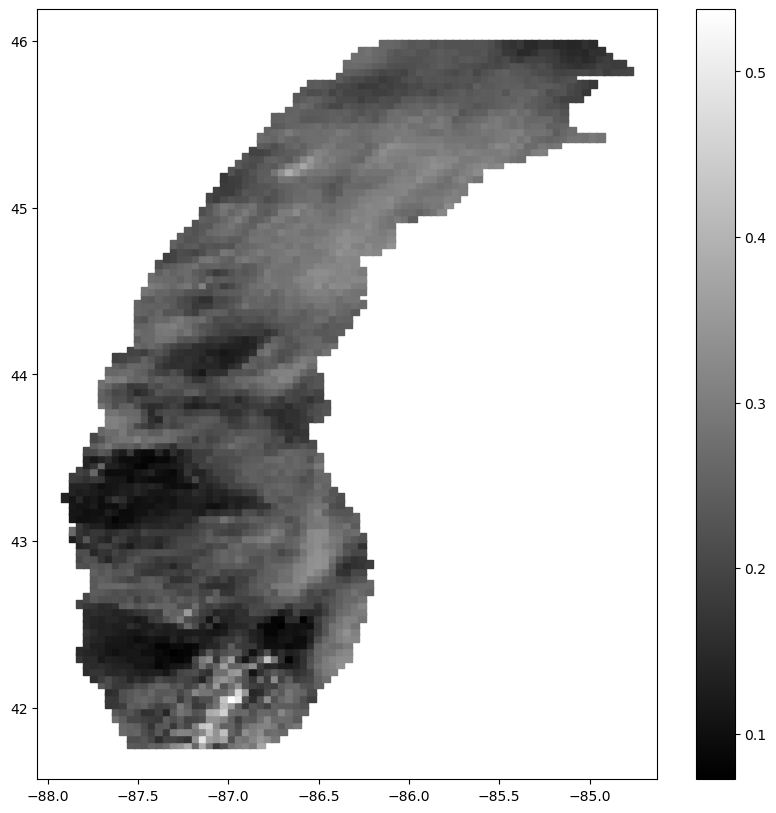

In [87]:
arrays_2_png(lat_lst, lon_lst, 
             [0.0 if el == 'nan' else float(el) for el in filtered_les['Lake_data_1D'][5177].strip('][').split(', ')], 
             'sample')

0

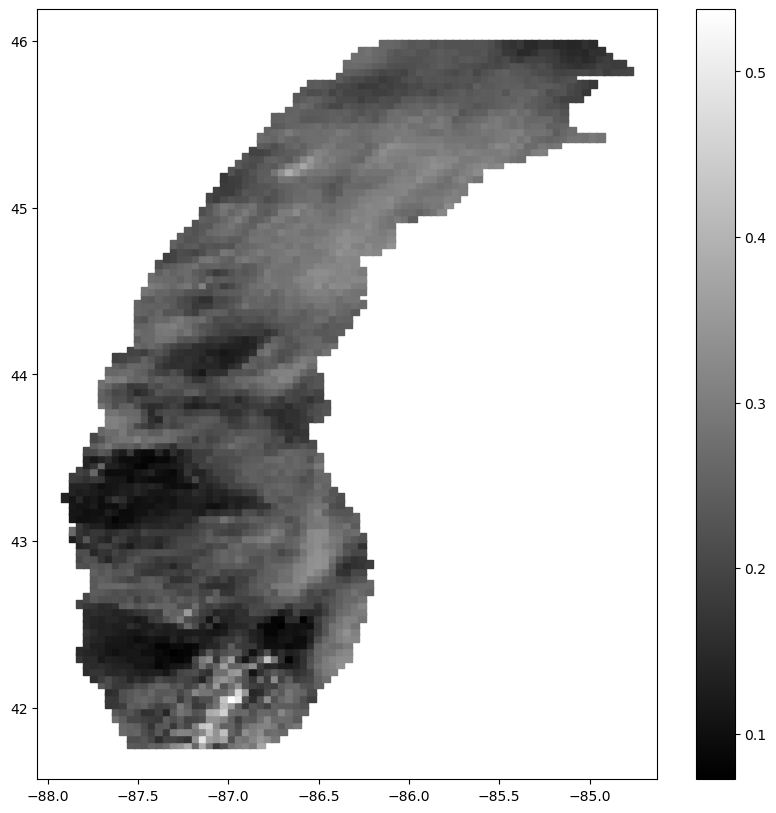

In [63]:
arrays_2_png(lat_lst, lon_lst, 
             rectify(filtered_les['Lake_data_1D'][5177]), 
             'sample')

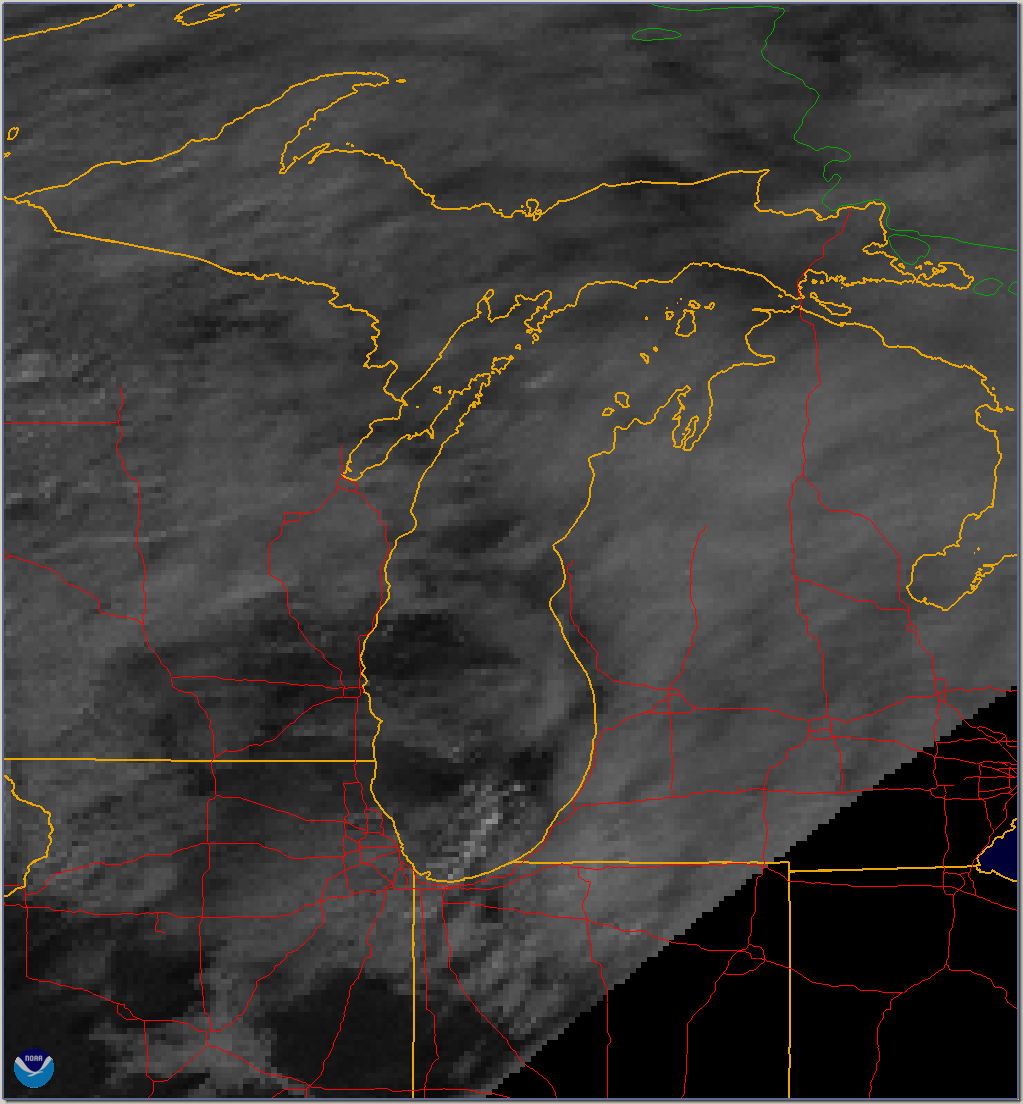

In [66]:
from IPython.display import Image
Image("D:/user/docs/NU/_Noctis/original-images/goes11.2008.01.10.1600.v01.nc.png")

Ok, this looks good.

In [68]:
filtered_les.loc[10457]

Date_UTC                                                        2010-11-11
Time_UTC                                                             16:00
Date_CST                                                        2010-11-11
Time_CST                                                             16:00
File_name_for_1D_lake               goes13.2010.11.11.1600.v01.nc-var0.csv
File_name_for_2D_lake         T_goes13.2010.11.11.1600.v01.nc-var0.csv.csv
Lake_data_1D             [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...
Lake_data_2D             [array([nan, nan, nan, nan, nan, nan, nan, nan...
Temp_F                                                                59.0
RH_pct                                                                64.0
Dewpt_F                                                               47.0
Wind_Spd_mph                                                             9
Wind_Direction_deg                                                     290
Peak_Wind_Gust_mph       

0

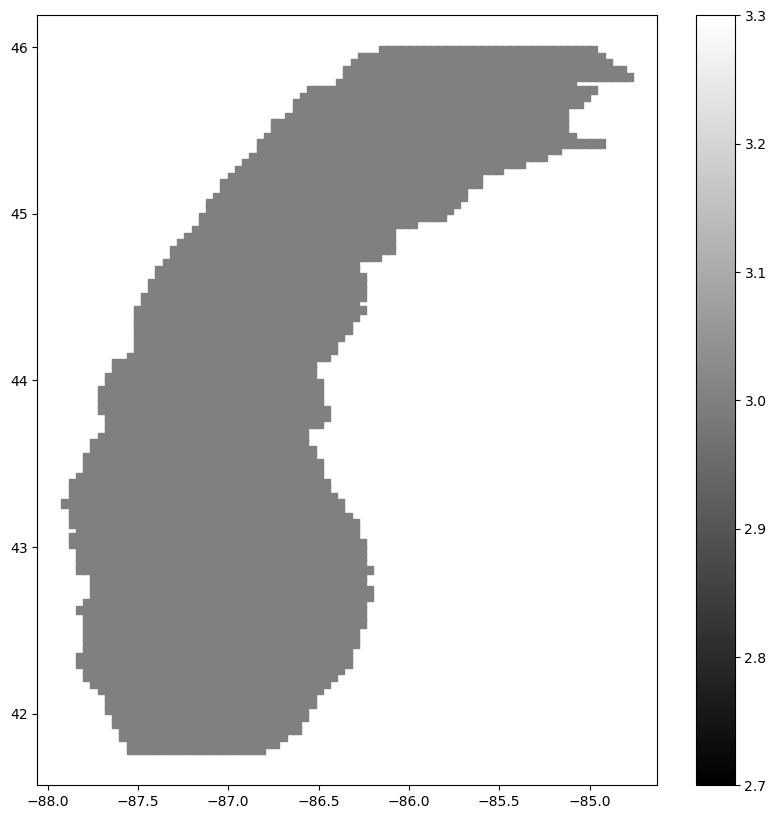

In [89]:
arrays_2_png(lat_lst, lon_lst, 
             rectify(filtered_les['Lake_data_1D'][10457]), 
             'sample')

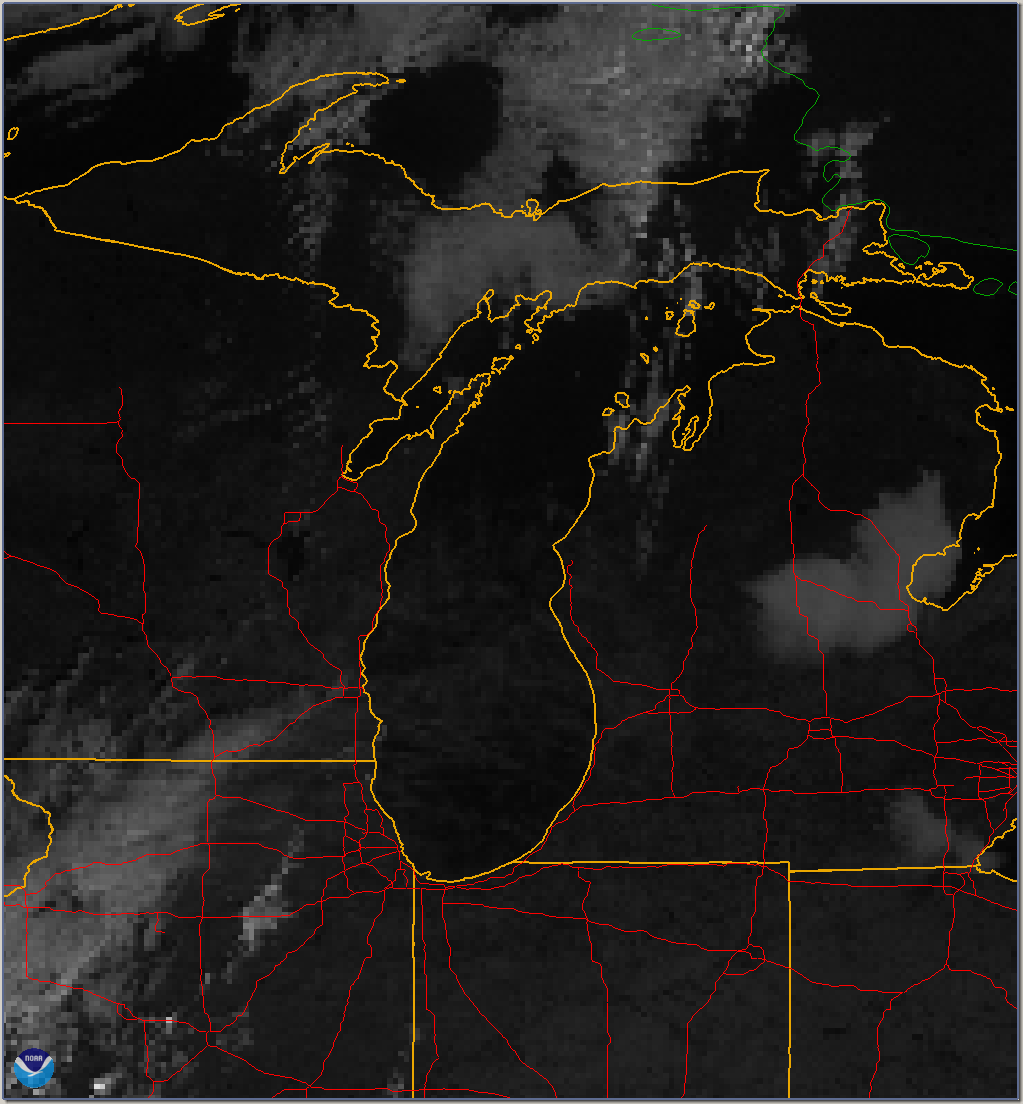

In [70]:
Image("D:/user/docs/NU/_Noctis/original-images/goes13.2010.11.11.1600.v01.nc.png")

Big discrepancy here... ***Please ingestigate***!

In [72]:
filtered_les.loc[10649]

Date_UTC                                                        2010-12-05
Time_UTC                                                             16:00
Date_CST                                                        2010-12-05
Time_CST                                                             16:00
File_name_for_1D_lake               goes13.2010.12.05.1600.v01.nc-var0.csv
File_name_for_2D_lake         T_goes13.2010.12.05.1600.v01.nc-var0.csv.csv
Lake_data_1D             [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...
Lake_data_2D             [array([nan, nan, nan, nan, nan, nan, nan, nan...
Temp_F                                                                28.0
RH_pct                                                                68.0
Dewpt_F                                                               19.0
Wind_Spd_mph                                                            16
Wind_Direction_deg                                                     310
Peak_Wind_Gust_mph       

0

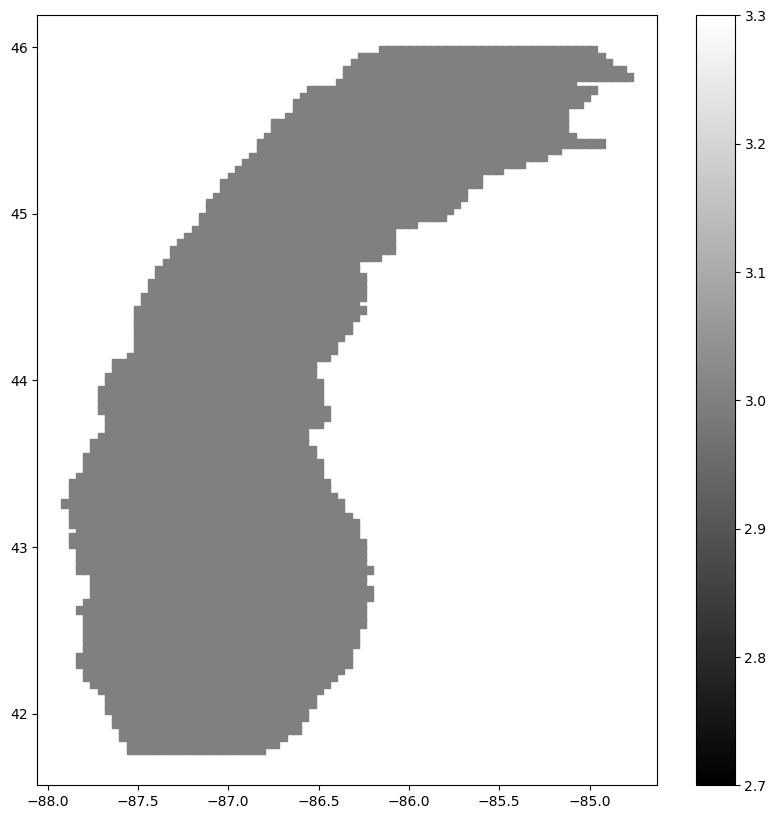

In [75]:
arrays_2_png(lat_lst, lon_lst, 
             rectify(filtered_les['Lake_data_1D'][10649]), 
             'sample')

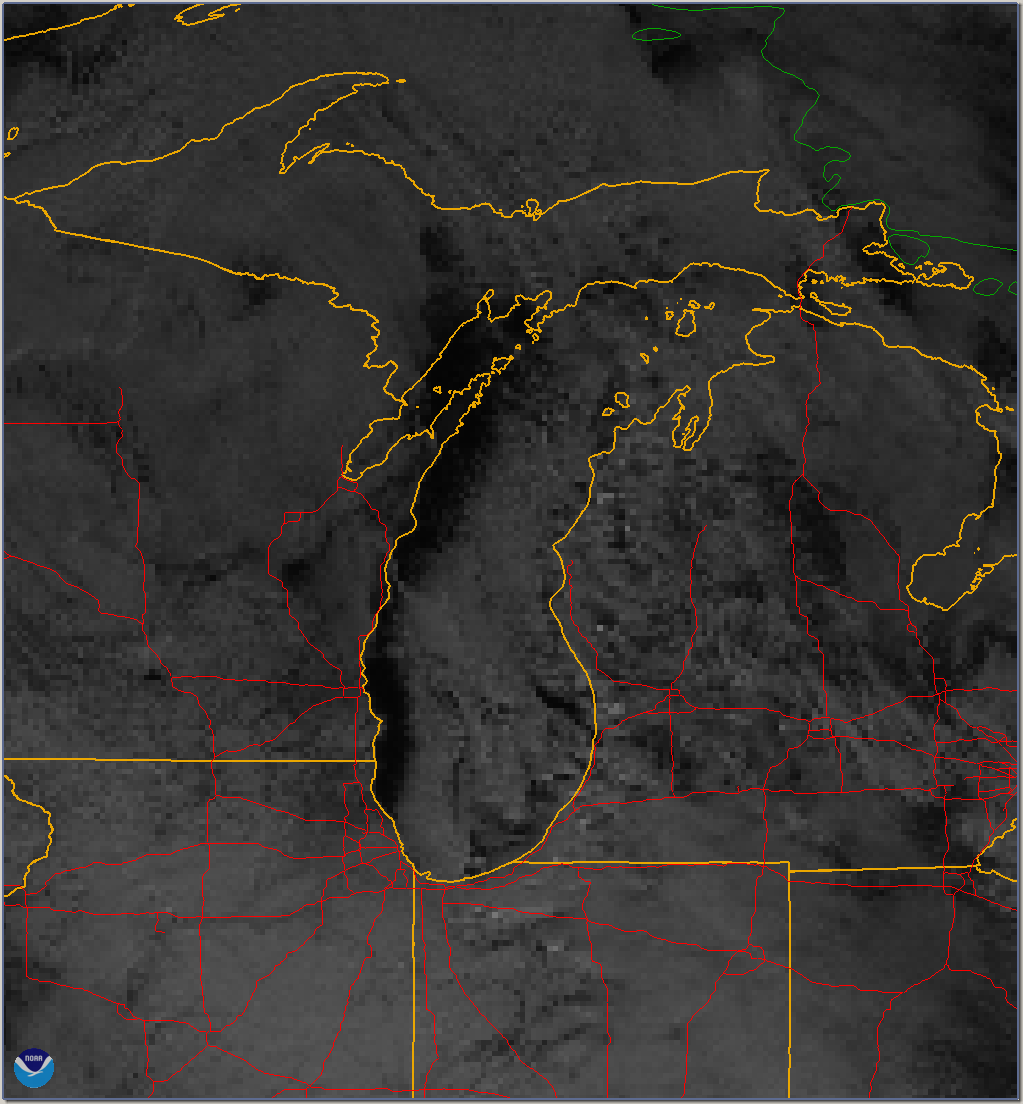

In [74]:
Image("D:/user/docs/NU/_Noctis/original-images/goes13.2010.12.05.1600.v01.nc.png")

Another snafu!!!

A small test first:

In [77]:
for i, row in les.iterrows():
    if i == 10:
        arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
        print(arr)
        arrays_2_png_data(lat_lst, lon_lst, arr, str(i))
        break

[0.012499999, 0.0075, 0.0175, 0.0175, 0.012499999, 0.012499999, 0.012499999, 0.012499999, 0.01, 0.01, 0.005, 0.01, 0.0075, 0.0075, 0.0175, 0.012499999, 0.012499999, 0.01, 0.012499999, 0.012499999, 0.0175, 0.012499999, 0.0175, 0.012499999, 0.015, 0.0025, 0.01, 0.015, 0.0025, 0.012499999, 0.01, 0.015, 0.022499999, 0.012499999, 0.015, 0.0075, 0.0025, 0.02, 0.015, 0.0075, 0.015, 0.012499999, 0.01, 0.012499999, 0.0075, 0.01, 0.0025, 0.0175, 0.0175, 0.012499999, 0.012499999, 0.01, 0.0025, 0.005, 0.015, 0.012499999, 0.01, 0.012499999, 0.0075, 0.02, 0.01, 0.01, 0.01, 0.01, 0.0175, 0.005, 0.012499999, 0.0075, 0.015, 0.012499999, 0.0075, 0.012499999, 0.012499999, 0.0075, 0.02, 0.0075, 0.01, 0.015, 0.0175, 0.012499999, 0.012499999, 0.0025, 0.0075, 0.012499999, 0.0175, 0.012499999, 0.0175, 0.0075, 0.012499999, 0.005, 0.015, 0.012499999, 0.012499999, 0.022499999, 0.012499999, 0.0175, 0.0075, 0.012499999, 0.012499999, 0.012499999, 0.012499999, 0.012499999, 0.01, 0.015, 0.012499999, 0.015, 0.015, 0.0

OK, this works. Let's read in the 1D column and serialize lake Michigan clouds:

In [78]:
from tqdm import tqdm
for i, row in tqdm(les.iterrows()):
    if i == 100:
        break

100it [00:00, 4545.83it/s]


In [79]:
from tqdm import tqdm
for i, row in tqdm(filtered_les.iterrows()):

    try:
        #arr = np.array(eval(row.Lake_data_1D))
        arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
        arrays_2_png_data(lat_lst, lon_lst, arr, str(i))
    except: # If no data is available (fill with zeros)
        #txt = row.Lake_data_1D
        #txt = txt.replace('nan', '0')
        #arr = np.array(eval(txt))
        print("oopsie at row:", i)

15959it [42:03,  6.32it/s]


Interesting... Looking at the folder, images around image #12921 are very incomplete. Memory issue? Let
stry regenerating that image:

In [80]:
for i, row in tqdm(les.iterrows()):
    try:
        if 12921 == i:
            #arr = np.array(eval(row.Lake_data_1D))
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, 'sample')
    except: # If no data is available (fill with zeros)
        #txt = row.Lake_data_1D
        #txt = txt.replace('nan', '0')
        #arr = np.array(eval(txt))
        print("oopsie at row", str(i))

47882it [00:02, 16684.09it/s]


Yes, that worked! So, it is *likely* a this notebook's memory issue!

Looking at the containing folder, it looks like images from image #10127 to image #13046 are corrupt!

Let's regenerate these in a separate folder:

In [81]:
def arrays_2_png_data_regen(lat, lon, val, fig_name, folder_name):
    status_code = -1

    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.axis('off')
        plt.savefig(folder_name + '/' + fig_name +'.png')
        plt.close()
        status_code = 0
    else:
        status_code = 255

    return status_code

In [82]:
for i, row in tqdm(les.iterrows()):
    try:
        if 10127 <= i <= 13046:
            #arr = np.array(eval(row.Lake_data_1D))
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data_regen(lat_lst, lon_lst, arr, str(i), "D:/user/docs/NU/_Noctis/lake-michigan-images-regen")
    except: # If no data is available (fill with zeros)
        #txt = row.Lake_data_1D
        #txt = txt.replace('nan', '0')
        #arr = np.array(eval(txt))
        print("oopsie at row", str(i))

47882it [07:59, 99.77it/s]   


Examining the regeneration folder, most of the images look suspiciously like brown noise. For example, image #12969. Let's regenerate that one to verify:

In [83]:
for i, row in tqdm(les.iterrows()):
    try:
        if i == 12969:
            #arr = np.array(eval(row.Lake_data_1D))
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data_regen(lat_lst, lon_lst, arr, 'sample', "D:/user/docs/NU/_Noctis/lake-michigan-images-regen")
    except: # If no data is available (fill with zeros)
        #txt = row.Lake_data_1D
        #txt = txt.replace('nan', '0')
        #arr = np.array(eval(txt))
        print("oopsie at row", str(i))

47882it [00:01, 35208.51it/s]


Yup, `sample` looks exactly lime image #12969 in the regenerating folder. 

Note the missing filename and missing data:

In [84]:
filtered_les.loc[12969]

Date_UTC                                                        2012-03-22
Time_UTC                                                             16:00
Date_CST                                                        2012-03-22
Time_CST                                                             16:00
File_name_for_1D_lake                                                 None
File_name_for_2D_lake                                                 None
Lake_data_1D             [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
Lake_data_2D                                                         [nan]
Temp_F                                                                75.0
RH_pct                                                                51.0
Dewpt_F                                                               56.0
Wind_Spd_mph                                                            10
Wind_Direction_deg                                                     100
Peak_Wind_Gust_mph       

In [85]:
filtered_les['Lake_data_1D'][12969]

'[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

So, appears to be a missing data issue?

When `File_name_for_1D_lake == None`, that means there is no image data, but we keep the meteo data.

So let's use this band of missing data as the separation between the training set and the validation set!

Note to myself: IN order to always ensure that data is not corrupt:

- For *each meteo city*, produce a combined csv just like Traverse City.

- Then, run logic that goes over *every row* and verifies that the image filename is not null *and* that the 1D data is not made out of a majority of nans.

- Then, randomly select 100 rows over the entire dataset and produce a 100-row 2-column image collection that plots lake Michigan cloud cover on the right and the original satellite image on the right.

We need to be able to scan all 100 images and verify that the cloud covers match.

I copy contents of folder `D:\user\docs\NU\_Noctis\lake-michigan-images-regen` into folder `D:\user\docs\NU\_Noctis\lake-michigan-images`.

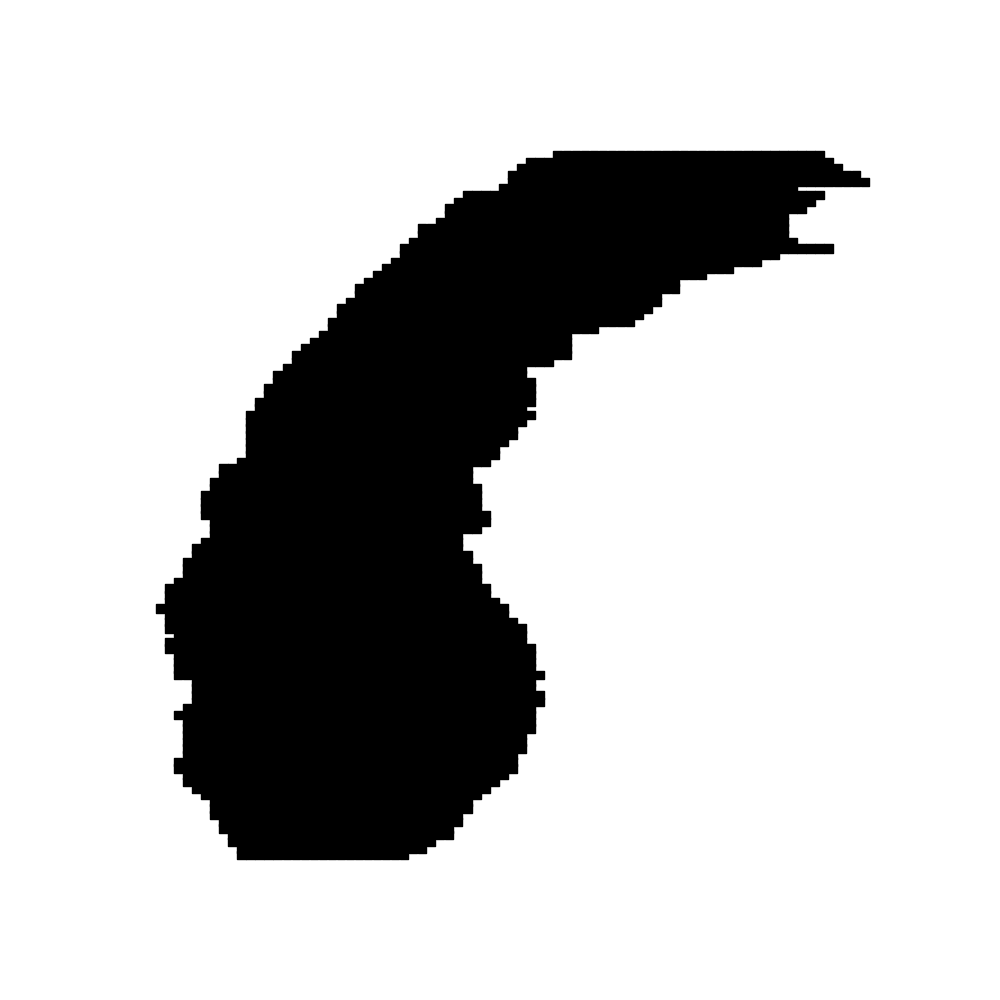

In [192]:
from PIL import Image, ImageOps

img = Image.open('D:/user/docs/NU/_Noctis/lake-michigan-images/39.png')
img

Let's create a mask that is all ones *over* lake Michigan, and all zeros over land:

In [193]:
#full = np.full(img.size, 255)
img = ImageOps.grayscale(img)
#mask = (full - img).astype(np.uint8)
#mask = (0 < mask).astype(int)
img = np.asarray(img)
mask = (255 != img).astype(int)
np.nonzero(mask)

(array([150, 150, 150, ..., 860, 860, 860], dtype=int64),
 array([553, 554, 555, ..., 406, 407, 408], dtype=int64))

In [194]:
(mask * 255)[150, 553], (mask * 255)[860, 408]

(255, 255)

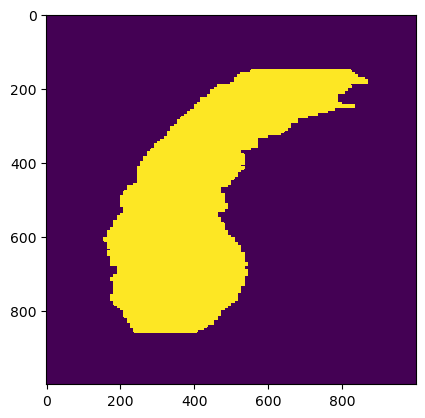

In [211]:
plt.imshow(mask * 255, interpolation='none')
plt.show()

Now let's see what Image #6 should really look like, without the spurious full-intensity over land:

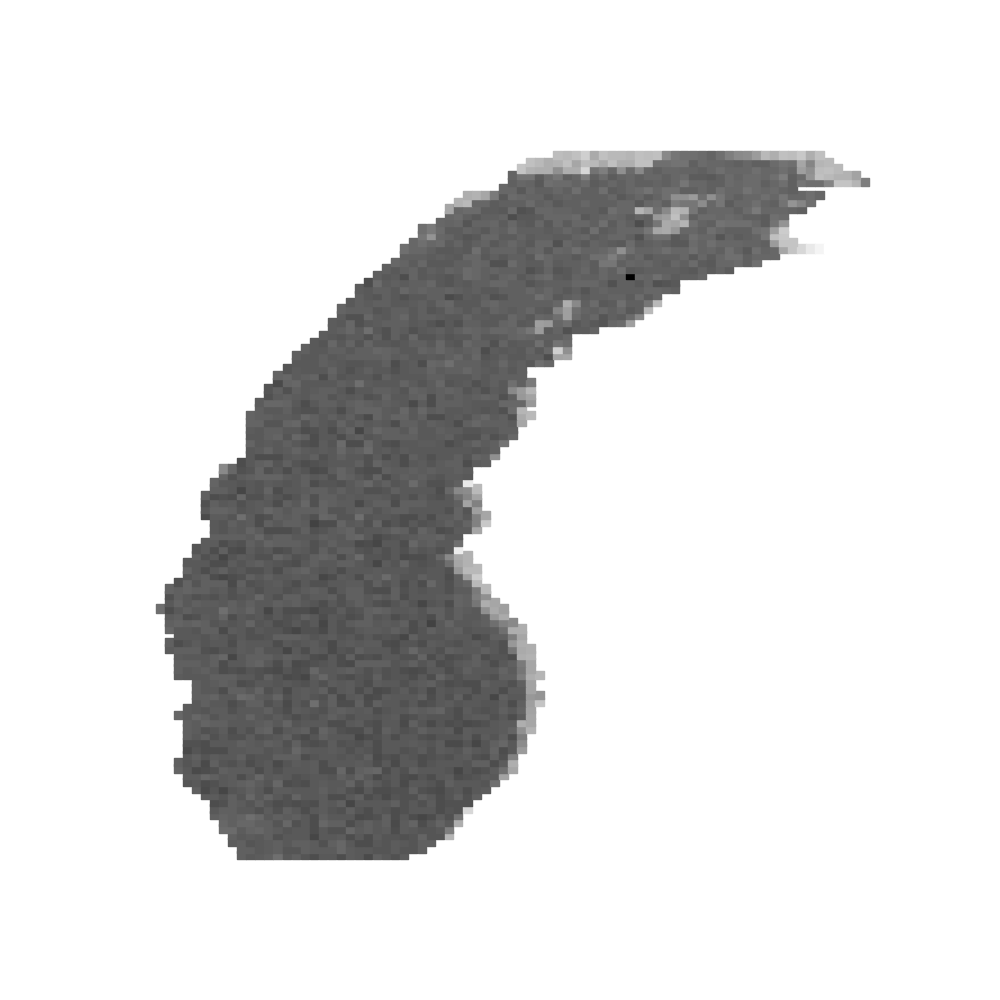

In [207]:
img = Image.open('D:/user/docs/NU/_Noctis/lake-michigan-images/6.png')
img = ImageOps.grayscale(img)
img

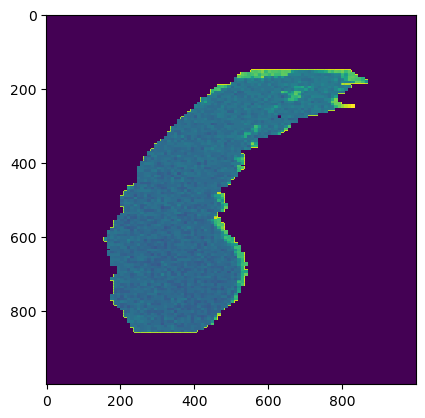

In [212]:
newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out outside region
plt.imshow(newimg, interpolation='none')
plt.show()

In [199]:
(newimg)[150, 553], (newimg)[860, 408]

(245, 231)

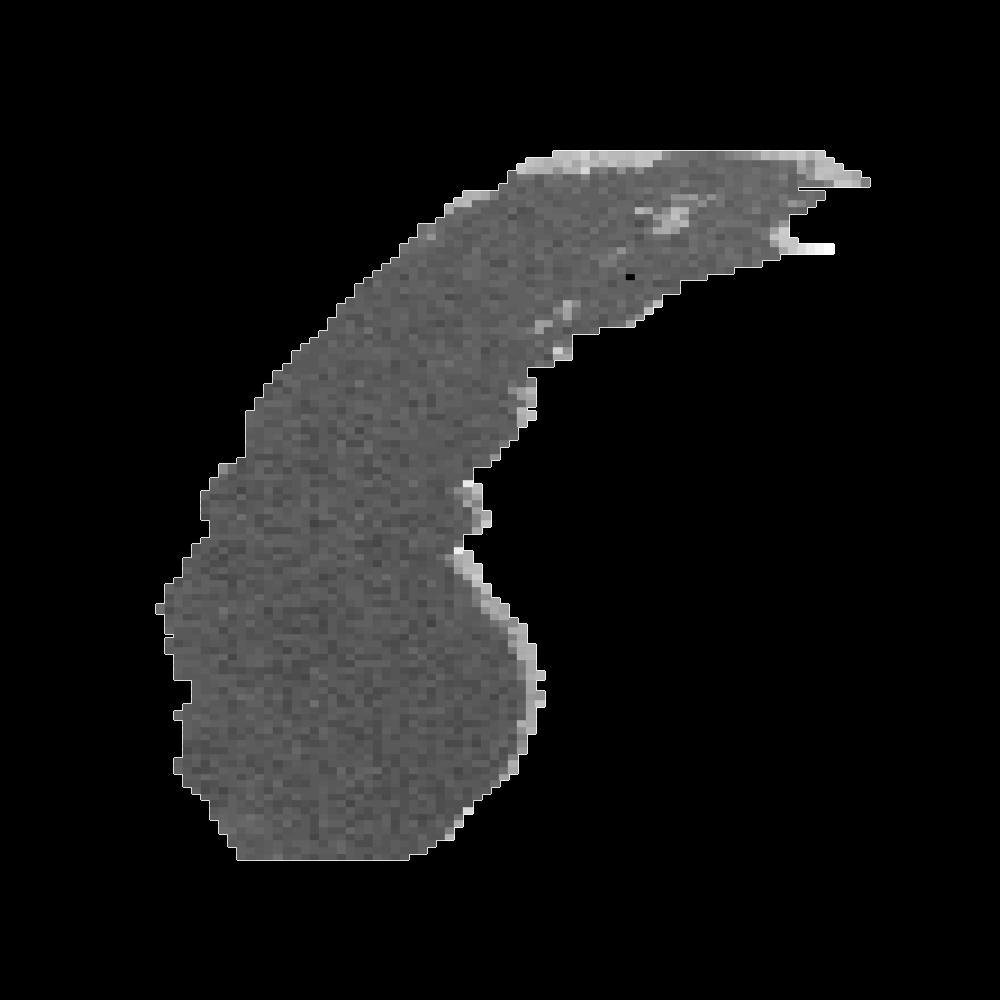

In [219]:
ImageOps.grayscale(Image.fromarray(newimg))

And this is how we save the image above:

In [220]:
ImageOps.grayscale(Image.fromarray(newimg)).save('D:/user/docs/NU/_Noctis/lake-michigan-images/sample.png')

To combine all ops:

In [222]:
f_img = 'D:/user/docs/NU/_Noctis/lake-michigan-images/6.png'
g_img = 'D:/user/docs/NU/_Noctis/lake-michigan-images/sample.png'
img = Image.open(f_img)
img = ImageOps.grayscale(img)
newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out land region
newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64))
newimg64.save(g_img)

So now let's repeat these operations *prior* to compressing to 64 $\times$ 64:

We now begin dropping dates in preparation for training:

In [290]:
filtered_les = filtered_les.drop(['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST'], axis=1)
filtered_les = filtered_les.reset_index(drop=True)
filtered_les.head()

KeyError: "['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST'] not found in axis"

In [296]:
# Summary
filtered_les.describe()

Temp_F        RH_pct       Dewpt_F  Wind_Spd_mph  \
count  14951.000000  14951.000000  14951.000000  14951.000000   
mean      35.158986     68.134038     25.198314      8.278443   
std       14.900897     15.099056     13.676064      4.890875   
min      -13.000000      0.000000    -20.000000      0.000000   
25%       25.000000     58.000000     16.000000      5.000000   
50%       34.000000     70.000000     25.000000      8.000000   
75%       45.000000     79.000000     34.000000     11.000000   
max       88.000000    100.000000     67.000000     32.000000   

       Wind_Direction_deg  Peak_Wind_Gust_mph  Low_Cloud_Ht_ft  \
count        14951.000000        14951.000000     14951.000000   
mean           169.181326            5.469400      4409.435489   
std            122.778311           10.092296      5578.458635   
min              0.000000            0.000000         0.000000   
25%             30.000000            0.000000      1600.000000   
50%            200.000000            0.000000      2500.000000   
75%            270.000000            0.000000      4000.000000   
max            360.000000           56.000000     28000.000000   

       Med_Cloud_Ht_ft  High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  \
count     14951.000000      14951.000000   14951.000000   14951.000000   
mean       4068.312487       1367.146010       7.902682     990.775179   
std        6712.363475       4531.667266       3.138534      46.758314   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          0.000000       6.000000     987.000000   
50%        1200.000000          0.000000      10.000000     993.300000   
75%        4400.000000          0.000000      10.000000     999.300000   
max       25000.000000      25000.000000      10.000000    1019.300000   

       Sea_Lev_Press_hPa  Altimeter_hPa     Precip_in  LES_Snowfall  
count       14951.000000   14951.000000  14951.000000  14951.000000  
mean          952.939221    1015.347662      0.002189      0.021671  
std           246.719346      23.806878      0.015708      0.145611  
min             0.000000       0.000000      0.000000      0.000000  
25%          1009.200000    1009.800000      0.000000      0.000000  
50%          1016.500000    1016.300000      0.000000      0.000000  
75%          1022.900000    1022.400000      0.000000      0.000000  
max          1044.500000    1042.700000      0.860000      1.000000

In [292]:
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])

Total observations:  14951
Total number of features:  19


# 5. Correlations
Plotting the pearson correlation plot to visualise the correlation between various features

In [305]:
filtered_les = filtered_les.drop(['File_name_for_1D_lake', 'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D'], axis=1)

Text(0.5, 1.0, 'Correlation Matrix')

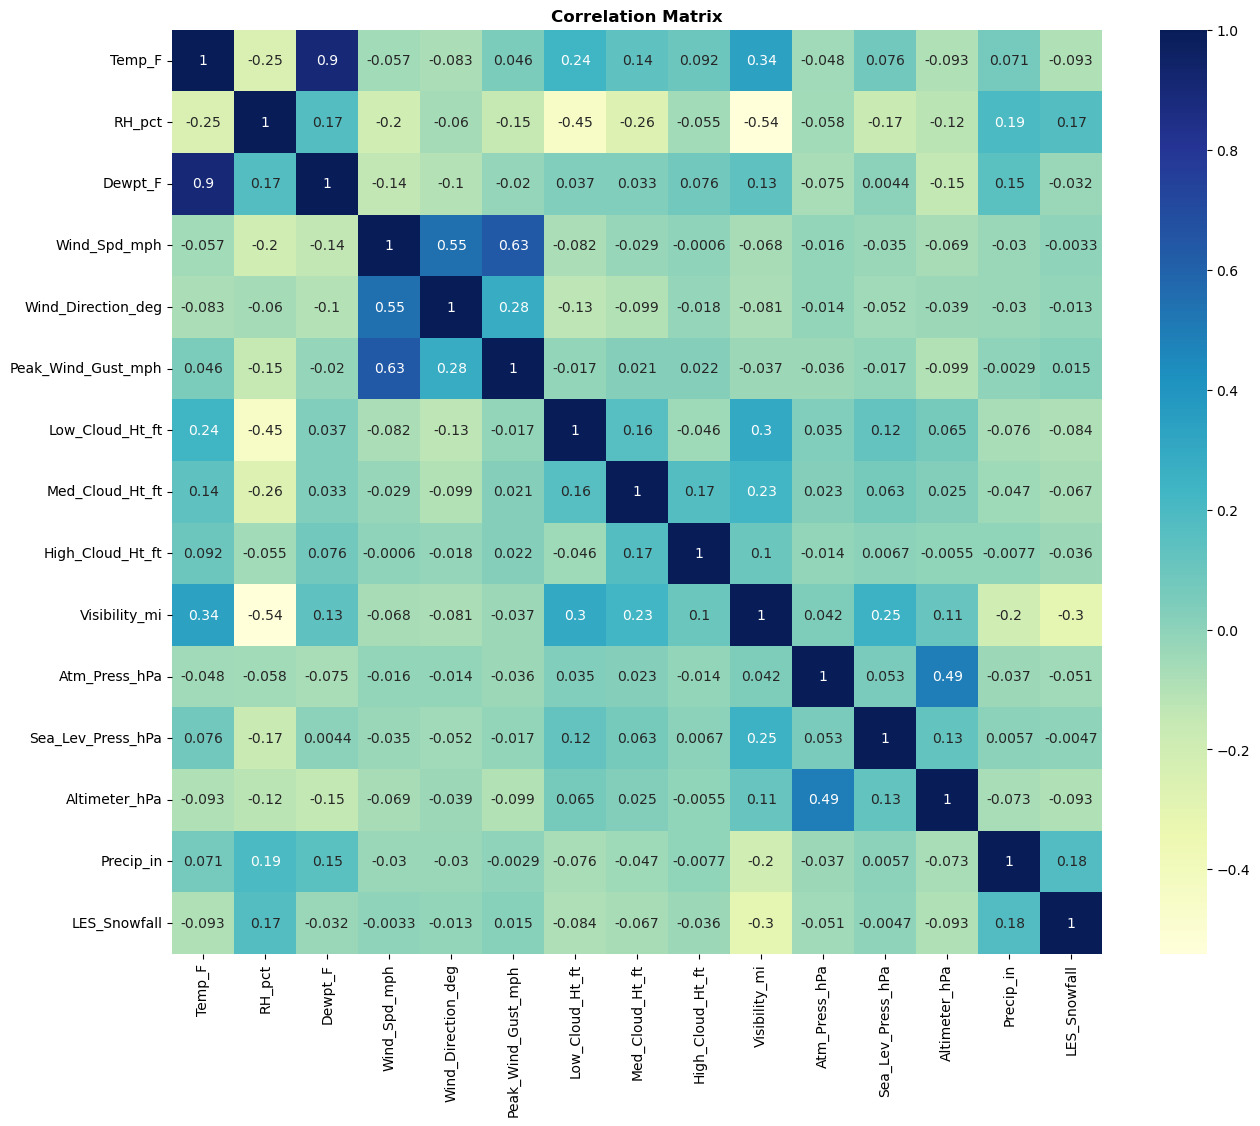

In [306]:
# Correlation 
correlation_matrix = filtered_les.corr(method = 'pearson')
plt.subplots(figsize=(15,12))

# Heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix", size = 12, weight = 'bold')

In [307]:
filtered_les = filtered_les.drop(['Dewpt_F', 'Peak_Wind_Gust_mph'], axis=1)
filtered_les = filtered_les.reset_index(drop=True)

# Information about dataset shape
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])
filtered_les.head()

Total observations:  14951
Total number of features:  13


Temp_F  RH_pct  Wind_Spd_mph  Wind_Direction_deg  Low_Cloud_Ht_ft  \
0    48.0    92.0             0                   0             3600   
1    55.0    59.0            11                 300             3600   
2    55.0    61.0            10                 300             3600   
3    58.0    55.0             8                 290             3600   
4    56.0    59.0            10                 260             3600   

   Med_Cloud_Ht_ft  High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  \
0                0                 0             10          993.0   
1                0                 0             10          993.7   
2                0                 0             10          994.3   
3                0                 0             10          995.0   
4                0                 0             10          995.0   

   Sea_Lev_Press_hPa  Altimeter_hPa  Precip_in  LES_Snowfall  
0             1016.3         1015.9        0.0           0.0  
1             1016.9         1016.6        0.0           0.0  
2             1017.5         1017.3        0.0           0.0  
3             1018.0         1017.9        0.0           0.0  
4             1018.1         1017.9        0.0           0.0

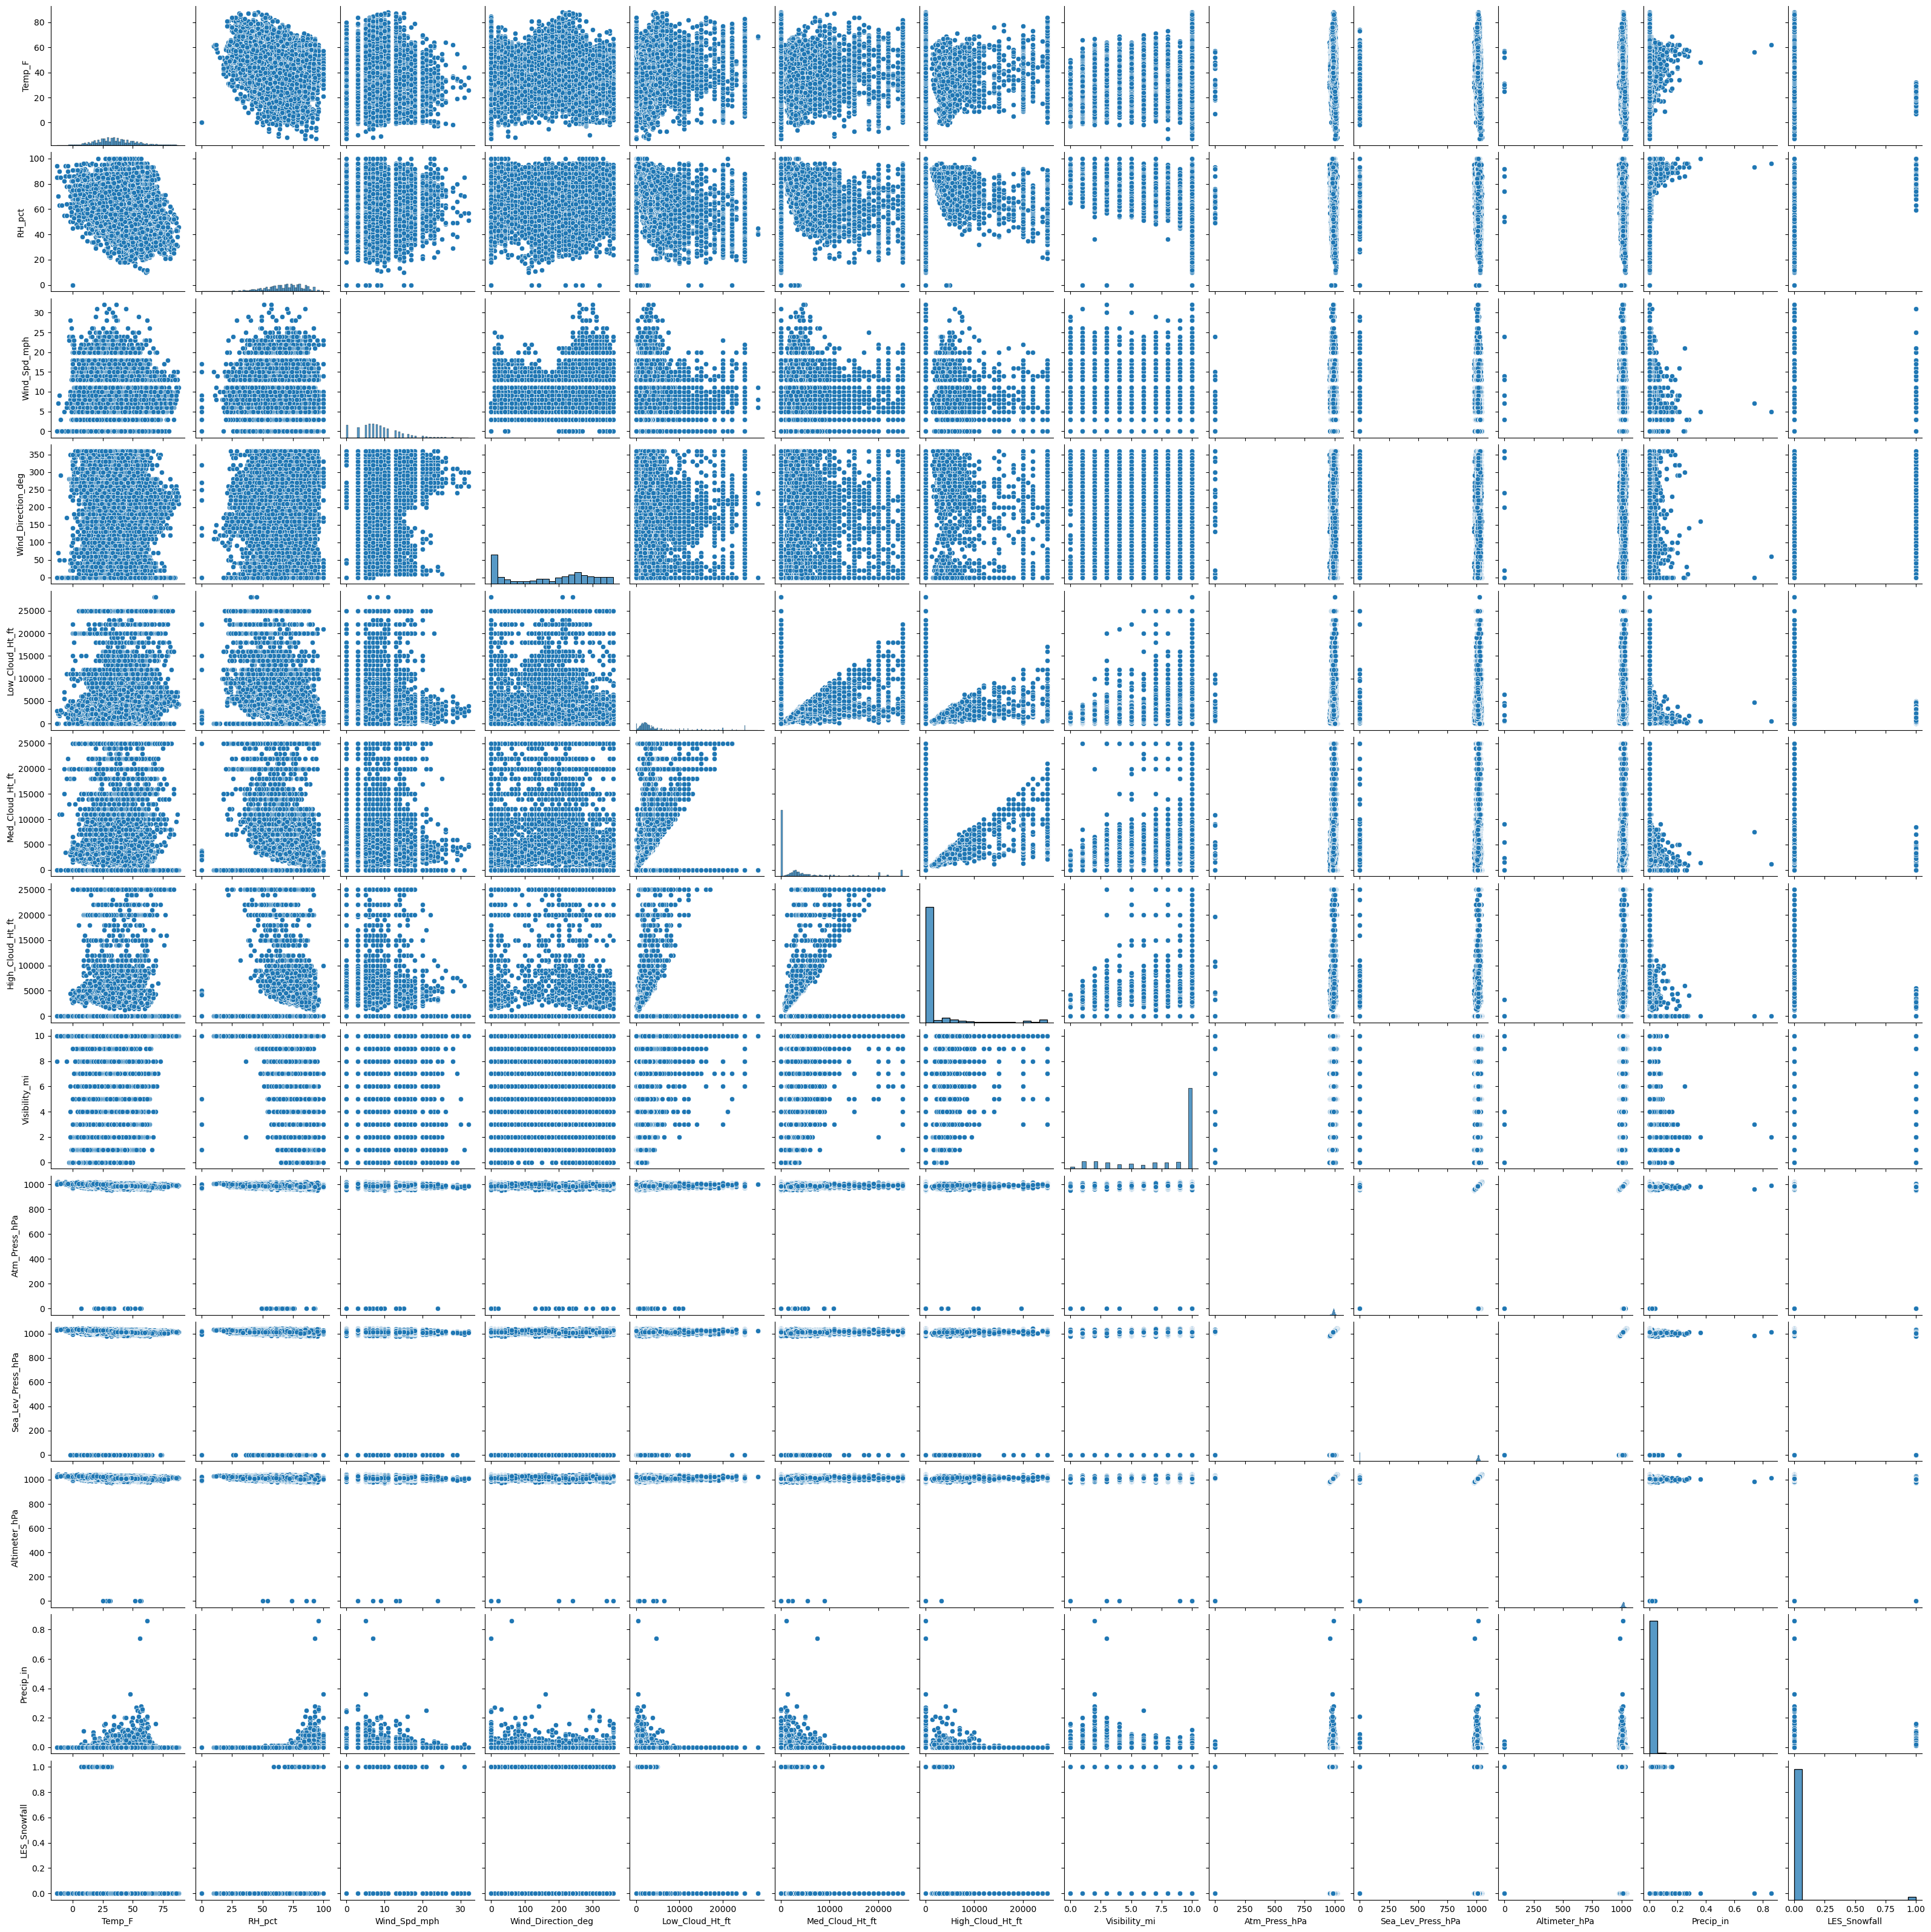

In [308]:
sns.pairplot(filtered_les)

# 6. Feature engineering: Precipitation

In [99]:
filtered_les["Precip_in"].value_counts()

0.00    14827
0.01      509
0.02      195
0.03      142
0.04       69
0.05       48
0.06       31
0.07       31
0.09       19
0.08       16
0.10       14
0.12       10
0.15        6
0.16        6
0.13        6
0.14        6
0.11        5
0.17        3
0.32        2
0.19        2
0.18        2
0.20        2
0.26        1
0.28        1
0.36        1
0.86        1
0.66        1
0.74        1
0.22        1
0.21        1
Name: Precip_in, dtype: int64

<AxesSubplot:xlabel='Precip_in', ylabel='Count'>

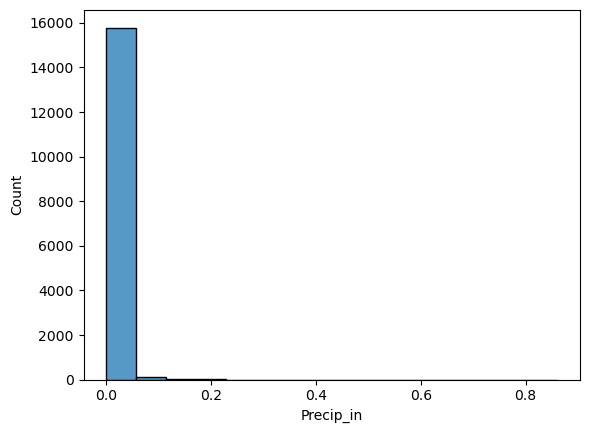

In [100]:
sns.histplot(filtered_les["Precip_in"])

In [101]:
filtered_les["Precip_in"][filtered_les["Precip_in"] > 0]

78       0.01
79       0.01
80       0.03
81       0.02
83       0.03
         ... 
15935    0.04
15936    0.01
15938    0.01
15939    0.01
15940    0.02
Name: Precip_in, Length: 1132, dtype: float64

<AxesSubplot:xlabel='Precip_in', ylabel='Count'>

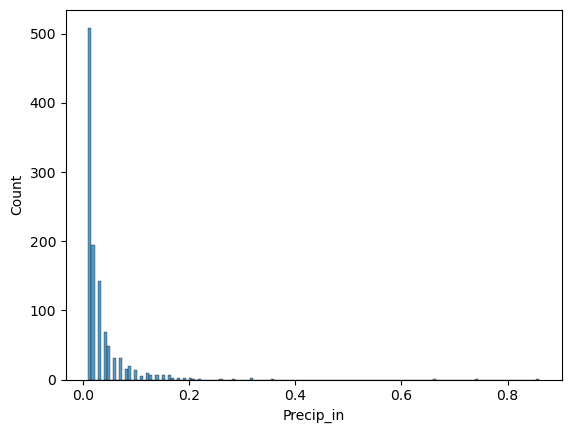

In [102]:
sns.histplot(filtered_les["Precip_in"][filtered_les["Precip_in"] > 0])

Adding a new column for precipitation:

In [103]:
filtered_les.loc[filtered_les['Precip_in'] > 0, 'LES_Precipitation'] = 1
filtered_les.loc[filtered_les['Precip_in'] <= 0, 'LES_Precipitation'] = 0
filtered_les

File_name_for_1D_lake  \
0      goes11.2006.10.01.1400.v01.nc-var1-t0.csv   
1      goes11.2006.10.01.1500.v01.nc-var1-t0.csv   
2      goes11.2006.10.01.1600.v01.nc-var1-t0.csv   
3      goes11.2006.10.01.1700.v01.nc-var1-t0.csv   
4      goes11.2006.10.01.1800.v01.nc-var1-t0.csv   
...                                          ...   
15954  goes15.2015.03.31.1700.v01.nc-var1-t0.csv   
15955  goes15.2015.03.31.1800.v01.nc-var1-t0.csv   
15956  goes15.2015.03.31.1900.v01.nc-var1-t0.csv   
15957  goes15.2015.03.31.2000.v01.nc-var1-t0.csv   
15958  goes15.2015.03.31.2100.v01.nc-var1-t0.csv   

                                 File_name_for_2D_lake  \
0      T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv   
1      T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv   
2      T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv   
3      T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv   
4      T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv   
...                                                ...   
15954  T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv   
15955  T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv   
15956  T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv   
15957  T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv   
15958  T_goes15.2015.03.31.2100.v01.nc-var1-t0.csv.csv   

                                            Lake_data_1D  \
0      [0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...   
1      [0.067499995, 0.067499995, 0.06, 0.06, 0.05749...   
2      [0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...   
3      [0.067499995, 0.067499995, 0.067499995, 0.07, ...   
4      [0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...   
...                                                  ...   
15954  [0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...   
15955  [0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...   
15956  [0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...   
15957  [0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...   
15958  [0.2225, 0.18249999, 0.19, 0.17999999, 0.1725,...   

                                            Lake_data_2D  Temp_F  RH_pct  \
0      [array([       nan,        nan,        nan,   ...    60.0    49.0   
1      [array([       nan,        nan,        nan,   ...    60.0    47.0   
2      [array([   nan,    nan,    nan,    nan,    nan...    59.0    55.0   
3      [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    55.0    71.0   
4      [array([   nan,    nan,    nan,    nan,    nan...    50.0    82.0   
...                                                  ...     ...     ...   
15954  [array([   nan,    nan,    nan,    nan,    nan...    39.0    54.0   
15955  [array([   nan,    nan,    nan,    nan,    nan...    37.0    61.0   
15956  [array([       nan,        nan,        nan,   ...    37.0    66.0   
15957  [array([   nan,    nan,    nan,    nan,    nan...    36.0    85.0   
15958  [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    36.0    85.0   

       Wind_Spd_mph  Wind_Direction_deg  Low_Cloud_Ht_ft  Med_Cloud_Ht_ft  \
0                10                 270             3600                0   
1                 3                   0                0                0   
2                 6                  40                0                0   
3                 0                   0                0                0   
4                 0                   0             8000                0   
...             ...                 ...              ...              ...   
15954             5                  20             7000            10000   
15955             3                 330             5500             7000   
15956            11                 310             3500             5500   
15957             0                   0             2100             2900   
15958             0                   0             4600                0   

       High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  Sea_Lev_Press_hPa  \
0                     0             10          994.7             1017

# 7. Predicting rain from cloud images

In [309]:
from tqdm import tqdm
import cv2

images = []
for idx in tqdm(range(15959)):
    # im shape -> (64, 64)
    im = cv2.imread('data/lake-michigan-images-64/' + str(idx) + '.png')
    # Storing 1 channel, since the images are grayscale, and cropping
    images.append(im[8:-8,8:-8,0]) 
    # images shape -> (35, 64, 64) 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15959/15959 [00:01<00:00, 10203.20it/s]


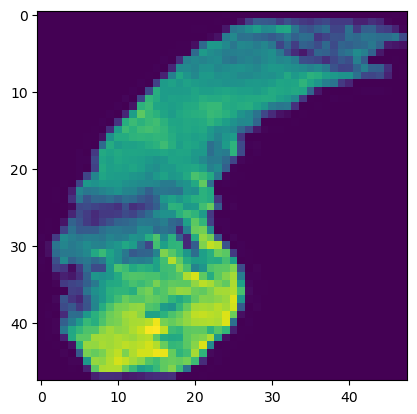

In [310]:
plt.imshow(images[146]) 

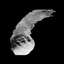

In [311]:
from PIL import Image, ImageOps
Image.open('data/lake-michigan-images-64/147.png')

## Cloud Sequence Visualization

Displaying next frames starting at image 3175.


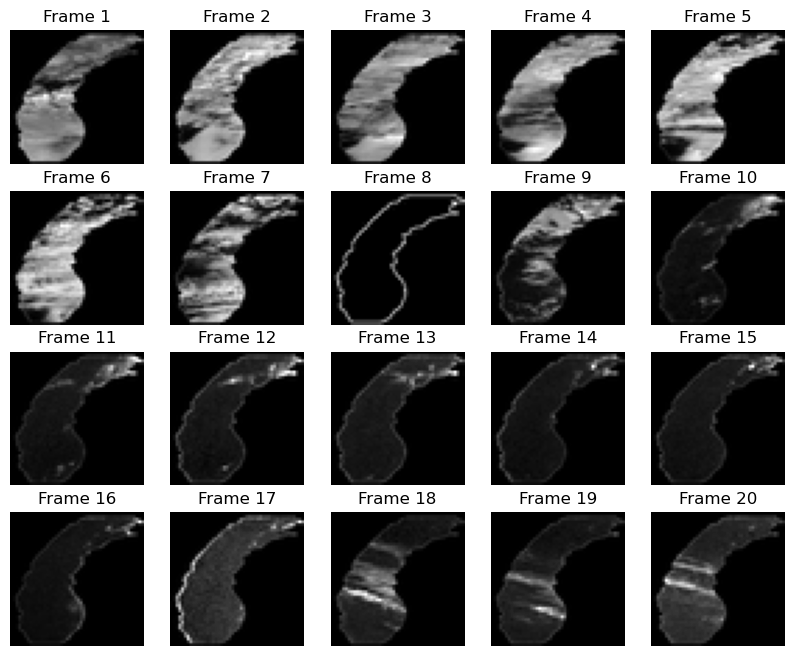

In [314]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(images)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(images[data_choice + idx], cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying next frames starting at image {data_choice}.")
plt.show()

# Image sequences prep
### Image tensor caching with `tf.keras.preprocessing.timeseries_dataset_from_array` api


In [315]:
from tqdm import tqdm
import cv2

batch = []
for idx in tqdm(range(100)):
    # im shape -> (64, 64)
    im = cv2.imread(f'data/lake-michigan-images-64/{int(idx)}.png')
    # Storing 1 channel, since the images are grayscale
    batch.append(im[:,:,0]) 
    # images shape -> (35, 64, 64) 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2842.82it/s]


In [316]:
len(batch), batch[0].shape

(100, (64, 64))

This is how we can create a sliding-window sequence of size 6, which takes the 100 images above and creates as many 6-long image sequences as possible with a size-1 sliding window so that the first sequence starts with the first image, the second sequence starts with the second image, etc.  

In [317]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox

In [318]:
sliding_batch = tf.keras.preprocessing.timeseries_dataset_from_array(batch, None, 6, sequence_stride=1, sampling_rate=1, 
                                                                     batch_size=100)

In [324]:
imgs_train_batch = tf.keras.preprocessing.timeseries_dataset_from_array(images[:3000], None, 7, sequence_stride=1, 
                                                                        sampling_rate=1, batch_size=3000)
imgs_val_batch = tf.keras.preprocessing.timeseries_dataset_from_array(images[3000:4000], None, 7, sequence_stride=1, 
                                                                       sampling_rate=1, batch_size=1000)

In [325]:
for batch in imgs_train_batch:
    print(batch.shape)
    print('--')

(2994, 7, 48, 48)
--


In [326]:
for batch in imgs_val_batch:
    print(batch.shape)
    print('--')

(994, 7, 48, 48)
--


Let's add a channel dimension and Normalize the data to the 0-1 range:

In [327]:
train_dataset = None
for batch in imgs_train_batch:
    train_dataset = np.expand_dims(batch, axis=-1)
    print(train_dataset.shape)
    train_dataset = train_dataset / 255

(2994, 7, 48, 48, 1)


In [328]:
val_dataset = None
for batch in imgs_val_batch:
    val_dataset = np.expand_dims(batch, axis=-1)
    print(val_dataset.shape)
    val_dataset = val_dataset / 255

(994, 7, 48, 48, 1)


We'll define a helper function to shift the frames, where `x` is frames 0 to n - 1, and `y` is frames 1 to n.

In [329]:
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y

# Apply the processing function to the datasets.
x_train, y_train = create_shifted_frames(train_dataset)
x_val, y_val = create_shifted_frames(val_dataset)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

Training Dataset Shapes: (2994, 6, 48, 48, 1), (2994, 6, 48, 48, 1)
Validation Dataset Shapes: (994, 6, 48, 48, 1), (994, 6, 48, 48, 1)


## Data Visualization

Our data consists of sequences of frames, each of which
are used to predict the upcoming frame. Let's take a look
at some of these sequential frames.

Displaying frames for example 816.


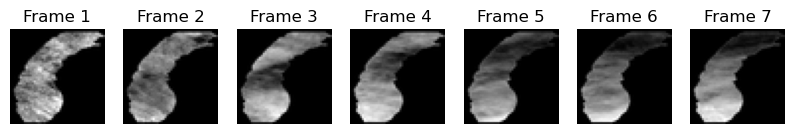

In [330]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1, 7, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(train_dataset)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(train_dataset[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

## Model Construction

To build a Convolutional LSTM model, we will use the
`ConvLSTM2D` layer, which will accept inputs of shape
`(batch_size, num_frames, width, height, channels)`, and return
a prediction movie of the same shape.

In [331]:
x_train.shape

(2994, 6, 48, 48, 1)

In [332]:
x_train.shape[2:]

(48, 48, 1)

In [333]:
(None, x_train.shape[2:])

(None, (48, 48, 1))

In [334]:
(None, *x_train.shape[2:])

(None, 48, 48, 1)

In [335]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    activation="relu",
)(inp)
print("Conv2D kernel_size=(5, 5)", x.shape)

Conv2D kernel_size=(5, 5) (None, None, 48, 48, 64)


In [336]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
print("ConvLSTM2D kernel_size=(5, 5)", x.shape)
x = layers.LayerNormalization()(x)
print("LayerNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D kernel_size=(3, 3)", x.shape)
x = layers.LayerNormalization()(x)
print("LayerNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D kernel_size=(1, 1)", x.shape)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)
print("Conv3D kernel_size=(3, 3, 3)", x.shape)

ConvLSTM2D kernel_size=(5, 5) (None, None, 48, 48, 64)
LayerNormalization (None, None, 48, 48, 64)
ConvLSTM2D kernel_size=(3, 3) (None, None, 48, 48, 64)
LayerNormalization (None, None, 48, 48, 64)
ConvLSTM2D kernel_size=(1, 1) (None, None, 48, 48, 64)
Conv3D kernel_size=(3, 3, 3) (None, None, 48, 48, 1)


Next, we will build the complete model and compile it.

In [337]:
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, 48, 48, 1   0         
                             )]                                  
                                                                 
 conv_lstm2d_12 (ConvLSTM2D  (None, None, 48, 48, 64   416256    
 )                           )                                   
                                                                 
 layer_normalization_5 (Lay  (None, None, 48, 48, 64   128       
 erNormalization)            )                                   
                                                                 
 conv_lstm2d_13 (ConvLSTM2D  (None, None, 48, 48, 64   295168    
 )                           )                                   
                                                                 
 layer_normalization_6 (Lay  (None, None, 48, 48, 64   128 

## Model Training

With our model and data constructed, we can now train the model.

Early stopping: Stop training when a monitored metric has stopped improving. The [EarlyStopping](https://keras.io/api/callbacks/early_stopping/) callback assumes the goal of a training is to minimize the loss. With this, the metric to be monitored would be 'loss', and mode would be 'min'. A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.

Reducing learning rate when a metric has stopped improving: Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. The [ReduceLROnPlateau](https://keras.io/api/callbacks/reduce_lr_on_plateau/) callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

Using parameter `min_delta=0.005` (`min_delta=0.0001` default)

In [338]:
# Define some callbacks to improve training
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, min_delta=0.005)

# Define modifiable training hyperparameters
epochs = 1
batch_size = 5

from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Started training at", current_time)

# Fit the model to the training data
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Finished training at", current_time)

Started training at 14:30:59


2023-12-13 14:31:01.842449: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp_16.


599/599 [==============================] - 384s 610ms/step - loss: 0.2469 - val_loss: 0.2387 - lr: 0.0010
Finished training at 14:37:24


## Frame Predictions

In [339]:
example_index = np.random.choice(range(len(val_dataset)), size=1)[0]
print(example_index)
example = val_dataset[example_index]
print(example.shape)
print(example[:3, ...].shape)
print(example[3:-1, ...].shape)

588
(7, 48, 48, 1)
(3, 48, 48, 1)
(3, 48, 48, 1)


Picked index 615 from validation dataset.
1/1 [==============================] - 4s 4s/step

The top row consists of 7 original frames.
The bottom row consists of the 5 original frames and the next two are predicted.


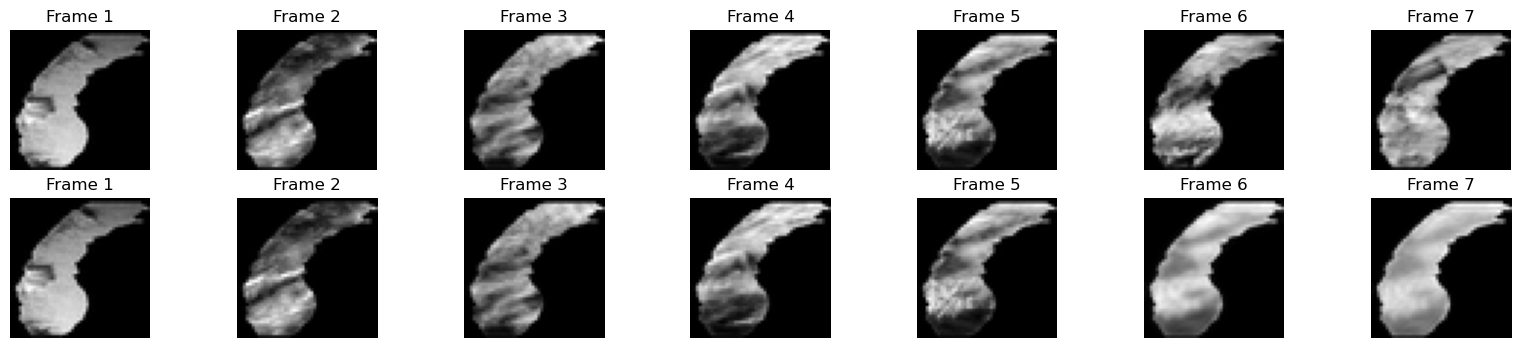

In [340]:
# Select a random example from the validation dataset
example_index = np.random.choice(range(len(val_dataset)), size=1)[0]
print("Picked index", example_index,"from validation dataset.")
example = val_dataset[example_index]

# Pick the first 5 frames from the example
frames = example[:5, ...]
original_frames = example[:, ...]

# Use the first 5 frames to predict the next 2 frames
# Note that the last predicted frame uses the first predicted
# frame (so, no teacher forcing here)
for _ in range(2):
    # Extract the model's prediction and post-process it
    new_prediction = model.predict(np.expand_dims(frames, axis=0))
    new_prediction = np.squeeze(new_prediction, axis=0)
    predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

    # Extend the set of prediction frames.
    frames = np.concatenate((frames, predicted_frame), axis=0)

# Construct a figure for the original and new frames
fig, axes = plt.subplots(2, 7, figsize=(20, 4))

# Plot the original frames
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Plot the new frames
new_frames = frames[:, ...]
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(new_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Display
print()
print("The top row consists of 7 original frames.")
print("The bottom row consists of the 5 original frames and the next two are predicted.")
plt.show()